In [1]:
library(tidyverse) 
library(janitor)  
library(ggcorrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
file_path <- "/kaggle/input/rentds/RentData.csv"

rentdata <- read.csv(file_path)

head(rentdata)

glimpse(rentdata)

,Price,No_rooms,No_bathrooms,Area,Adress,Colony,Type
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,120000,4,4,635,El Palomar,Tlajomulco de Zúñiga,House
2,35000,4,4,147,Fraccionamiento Solares,Zapopan,House
3,35000,3,3,255,Virreyes Residencial,Zapopan,House
4,59000,3,4,349,Valle Real,Zapopan,House
5,13000,2,1,50,Alcalde Barranquitas,Guadalajara,House
6,31000,3,3,240,Providencia,Guadalajara,House


Rows: 2,000
Columns: 7
$ Price        <int> 120000, 35000, 35000, 59000, 13000, 31000, 35000, 22000, …
$ No_rooms     <int> 4, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 2, 3, 4, 4, …
$ No_bathrooms <int> 4, 4, 3, 4, 1, 3, 4, 3, 3, 3, 3, 3, 2, 5, 3, 1, 3, 4, 4, …
$ Area         <int> 635, 147, 255, 349, 50, 240, 148, 200, 136, 200, 500, 333…
$ Adress       <chr> "El Palomar", "Fraccionamiento Solares", "Virreyes Reside…
$ Colony       <chr> "Tlajomulco de Zúñiga", "Zapopan", "Zapopan", "Zapopan", …
$ Type         <chr> "House", "House", "House", "House", "House", "House", "Ho…


## Standardize and Rename Columns
I renamed the 'colony' column to 'municipality' and the 'address' column to 'neighborhood' for better clarity and understanding.

In [3]:
rentdata <- rentdata %>%
  clean_names() %>% # Clean column names is from janitor
  rename(           # rename columns
      municipality = colony,
      neighborhood = adress,
  )

 head(rentdata)

,price,no_rooms,no_bathrooms,area,neighborhood,municipality,type
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,120000,4,4,635,El Palomar,Tlajomulco de Zúñiga,House
2,35000,4,4,147,Fraccionamiento Solares,Zapopan,House
3,35000,3,3,255,Virreyes Residencial,Zapopan,House
4,59000,3,4,349,Valle Real,Zapopan,House
5,13000,2,1,50,Alcalde Barranquitas,Guadalajara,House
6,31000,3,3,240,Providencia,Guadalajara,House


## Data Distribution


#### Number of records for each municipality

In [4]:
data_records <- rentdata %>% 
    count(municipality) %>%
  rename(records = n) %>%
  mutate(percentage = round(records/sum(records)*100,2)) %>%
  arrange(desc(percentage))

data_records

municipality,records,percentage
<chr>,<int>,<dbl>
Zapopan,1123,56.15
Guadalajara,615,30.75
Tlajomulco de Zúñiga,230,11.50
Jalisco,16,0.80
Tonalá,13,0.65
El Palomar,3,0.15


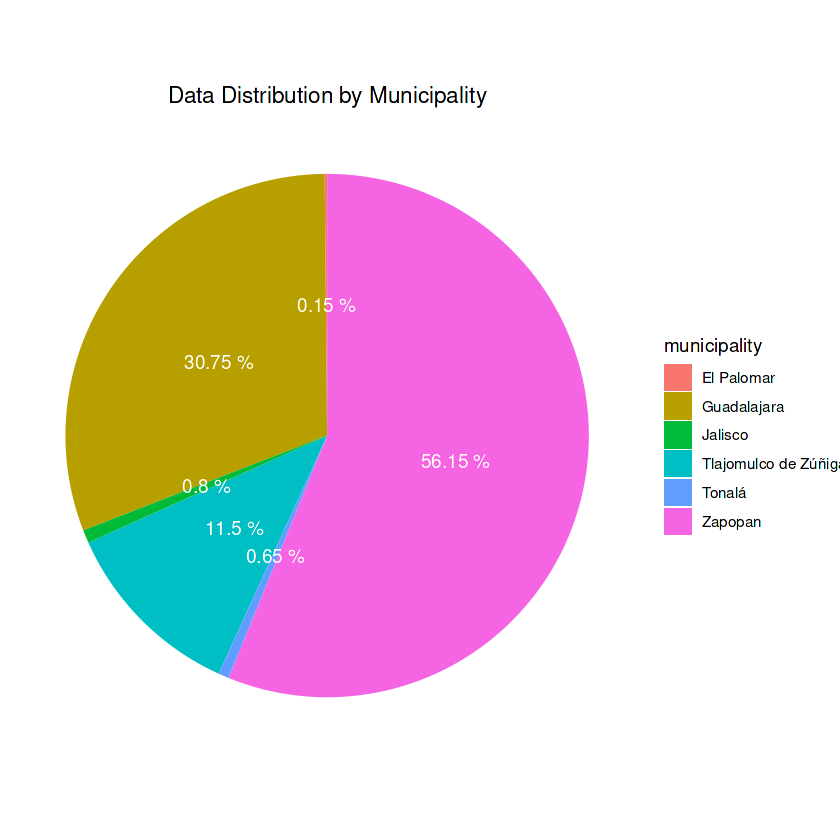

In [5]:
# Pie chart
ggplot(data_records, aes(x = "", y = records, fill = municipality)) + # x = "" to stacked together the bars
  geom_col() +      # geom_col because I already have the count for records (y), geom_col(color = "white") adds a white border around each bar
  coord_polar(theta = "y") +                 # Convert to pie chart
  
  labs(
      title = "Data Distribution by Municipality"    # Title of the chart
  ) +                     
  geom_text(
      aes(label = paste(percentage, "%")), 
      position = position_stack(vjust = 0.5), # Add percentages in the center of the slices
      color = "white"                        # Color the text white 
  ) +
  theme_void()    +                             # Remove background and axes
  theme(
      plot.title = element_text(hjust = 0.5),  # Center the title
      plot.margin = margin(0, 0, 0, 0),        # Remove plot margin for a clean look
      axis.text.x = element_blank()            # Remove x-axis labels (for a pie chart)
  )    


In [6]:
summary(rentdata)

     price            no_rooms       no_bathrooms         area        
 Min.   :   2950   Min.   : 1.000   Min.   : 1.000   Min.   :    1.0  
 1st Qu.:  17000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.:   90.0  
 Median :  25000   Median : 3.000   Median : 2.000   Median :  130.0  
 Mean   :  38637   Mean   : 2.779   Mean   : 2.522   Mean   :  207.2  
 3rd Qu.:  36000   3rd Qu.: 3.000   3rd Qu.: 3.000   3rd Qu.:  219.0  
 Max.   :8100000   Max.   :33.000   Max.   :10.000   Max.   :13300.0  
                   NA's   :23       NA's   :70       NA's   :11       
 neighborhood       municipality           type          
 Length:2000        Length:2000        Length:2000       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                          

#### Histograms 

Warning message:
“Removed 104 rows containing non-finite outside the scale range (`stat_bin()`).”


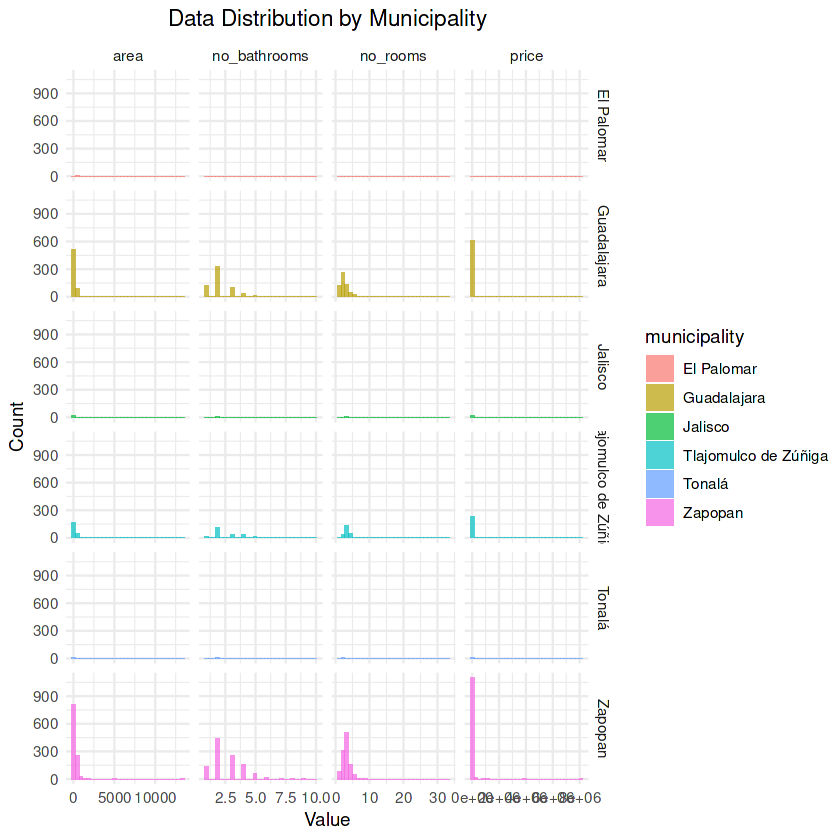

In [7]:
rent_long <- rentdata %>%
  pivot_longer(cols = c(price, area, no_rooms, no_bathrooms),  
               names_to = "Variable", 
               values_to = "Value")

ggplot(rent_long, aes(x = Value, fill = municipality)) +
  geom_histogram(alpha = 0.7, bins = 30, position = "identity") +
  facet_grid(municipality~Variable, scales = "free_x") +  # Facet by both Variable & Municipality
  labs(title = "Data Distribution by Municipality", x = "Value", y = "Count") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))  # Center the title

### Identify missing values

I will keep rows with missing values, as they still contain relevant data that can be valuable for the analysis. 

In [8]:
sum(is.na(rentdata))  # Total number of missing values
colSums(is.na(rentdata))  # Count of missing values in each column

[1] 104

price     no_rooms no_bathrooms         area neighborhood municipality 
           0           23           70           11            0            0 
        type 
           0

### Identify incorrect values
 
By examining the unique values in the municipality column, I noticed that Jalisco (a state) and El Palomar (a neighborhood) were incorrectly listed as municipalities.

After filtering properties labeled as Jalisco, I found that they actually belong to Zapopan or Tlajomulco de Zúñiga. To correct this, I reassigned the appropriate municipality based on location. Since the specific neighborhood for these entries was unknown, I replaced the neighborhood value with NA.

I deleted the rows where municipality was El Palomar.

In [9]:
distict_municipality <- unique(rentdata$municipality)
print(distict_municipality)

[1] "Tlajomulco de Zúñiga" "Zapopan"              "Guadalajara"         
[4] "El Palomar"           "Tonalá"               "Jalisco"             


In [10]:
jalisco <- rentdata  %>%
    filter(municipality=='Jalisco')

print(jalisco)

   price no_rooms no_bathrooms area         neighborhood municipality
1  26000        3            4  165              Zapopan      Jalisco
2  10000        3            2   89 Tlajomulco de Zúñiga      Jalisco
3  25000        6            5  120              Zapopan      Jalisco
4   8500        3            2   70 Tlajomulco de Zúñiga      Jalisco
5  21160        2            2  250 Tlajomulco de Zúñiga      Jalisco
6  10000        3            2   89 Tlajomulco de Zúñiga      Jalisco
7  15000        2            1   58              Zapopan      Jalisco
8  25000       NA           NA  120              Zapopan      Jalisco
9  12300        1            2  140              Zapopan      Jalisco
10 30000        3            3  200              Zapopan      Jalisco
11 15000        2            1   58              Zapopan      Jalisco
12 14000        3            2  140 Tlajomulco de Zúñiga      Jalisco
13 10000        3            2   89 Tlajomulco de Zúñiga      Jalisco
14  8500        3   

In [11]:
rentdc <- rentdata %>%
  mutate(
    municipality = case_when(
      municipality == 'Jalisco' & neighborhood == 'Zapopan' ~ 'Zapopan',
      municipality == 'Jalisco' & neighborhood == 'Tlajomulco de Zúñiga' ~ 'Tlajomulco de Zúñiga',
      TRUE ~ municipality  # Keep municipality unchanged otherwise
    ),
    neighborhood = case_when(
      neighborhood == 'Zapopan' ~ NA_character_,  
      neighborhood == 'Tlajomulco de Zúñigaa' ~ NA_character_, 
      TRUE ~ neighborhood  # Keep neighborhood unchanged otherwise
    )
  ) %>%
  filter(municipality != "El Palomar")  # Filter rows where municipality is not "El Palomar"

In [12]:
rentdc_filtered <- rentdc %>%
    filter(is.na(neighborhood)) # check for NA values in neighborhood

print(rentdc_filtered)

  price no_rooms no_bathrooms area neighborhood municipality       type
1 26000        3            4  165         <NA>      Zapopan      House
2 25000        6            5  120         <NA>      Zapopan      House
3 15000        2            1   58         <NA>      Zapopan      House
4 25000       NA           NA  120         <NA>      Zapopan      House
5 12300        1            2  140         <NA>      Zapopan      House
6 30000        3            3  200         <NA>      Zapopan      House
7 15000        2            1   58         <NA>      Zapopan      House
8 12300        3            2  120         <NA>      Zapopan      House
9 21500        3            2  157         <NA>      Zapopan Department


## Identify Outliers

#### Identifying Outliers in Rent Prices

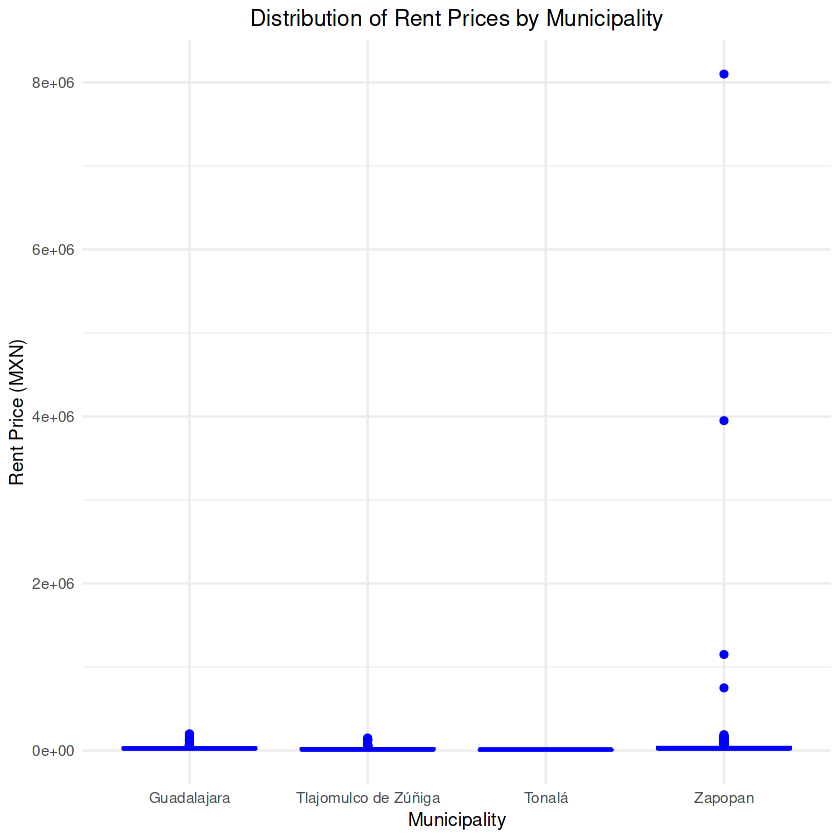

In [13]:
ggplot(rentdc, aes(x = municipality, y = price)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(title = "Distribution of Rent Prices by Municipality", x = "Municipality", y = "Rent Price (MXN)") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))

#### Identifying Outliers in Area

Warning message:
“Removed 11 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


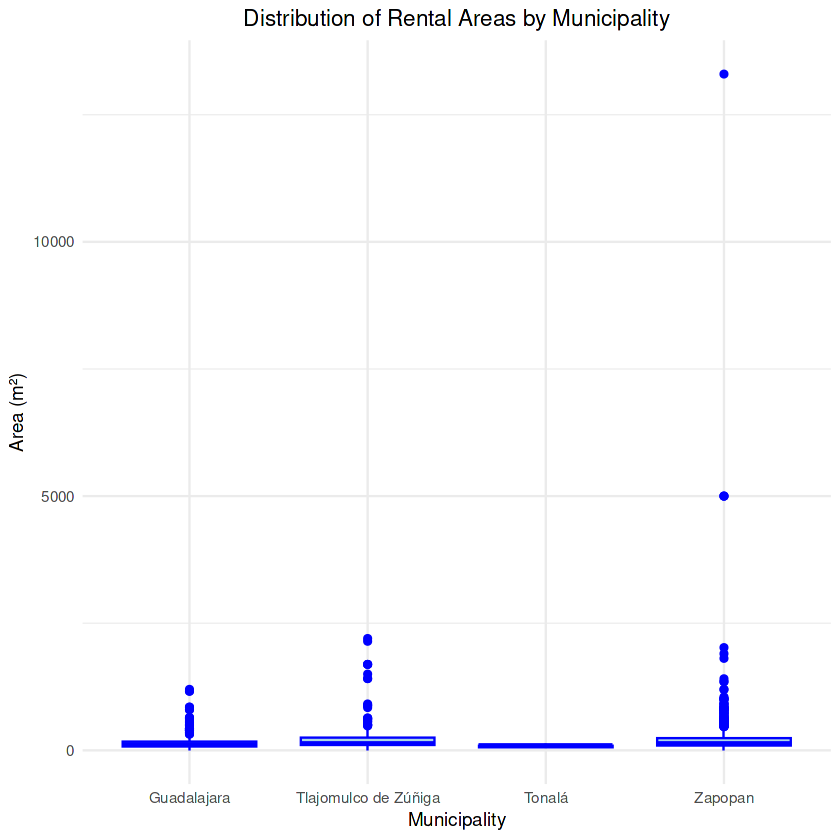

In [14]:
ggplot(rentdc, aes(x = municipality, y = area)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(title = "Distribution of Rental Areas by Municipality", x = "Municipality", y = "Area (m²)") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))

#### Identifying outliers in rooms

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


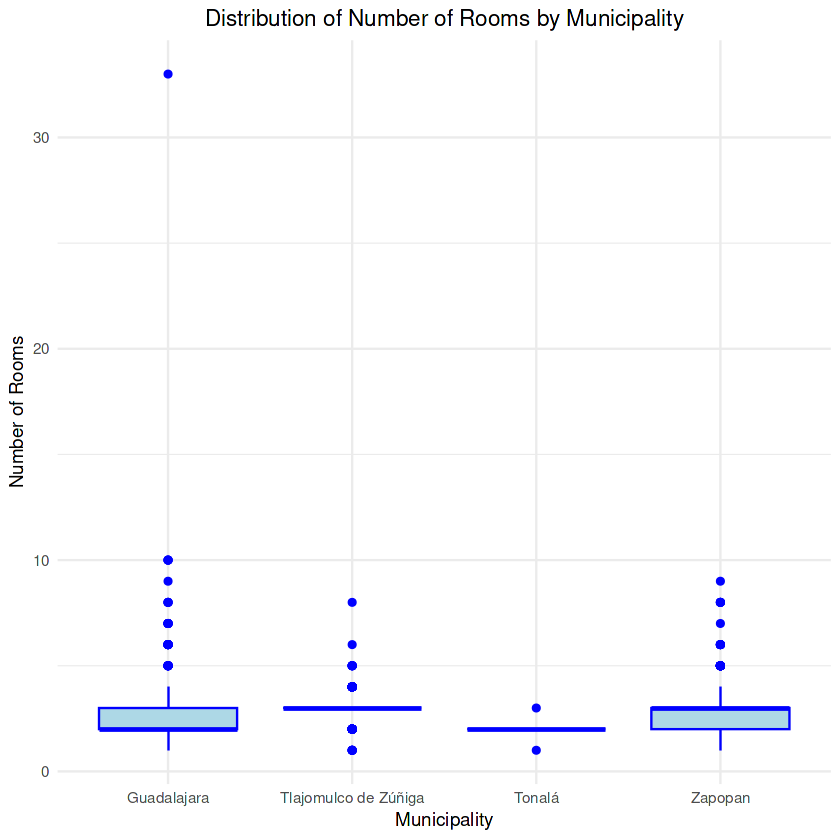

In [15]:
ggplot(rentdc, aes(x = municipality, y = no_rooms)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(title = "Distribution of Number of Rooms by Municipality", 
       x = "Municipality", 
       y = "Number of Rooms") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

#### Identifying outliers in bathrooms

Warning message:
“Removed 70 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


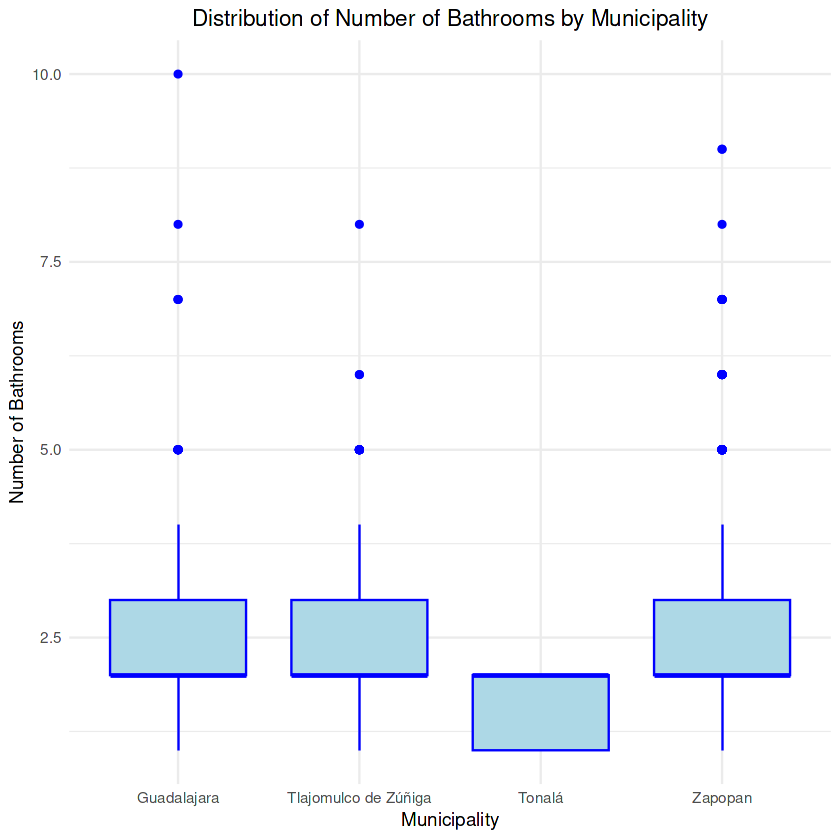

In [16]:
ggplot(rentdc, aes(x = municipality, y = no_bathrooms)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
 labs(title = "Distribution of Number of Bathrooms by Municipality", 
       x = "Municipality", 
       y = "Number of Bathrooms") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))

### Determine which values to remove

#### Exclude Prices >= 100,000 
- Extremely high rental prices are likely outliers or luxury properties that do not represent the general market trend.
#### Exclude Areas < 20 m² (Tiny Properties)
- Exclude areas smaller than 20 m², as they are unrealistic for standard housing; such listings often represent storage units, single rooms, or tiny studios that may not reflect actual rental properties, and smaller values could result from data entry errors that distort trends.

#### Exclude Areas > 400 m² (Extremely Large Properties)
- Houses larger than 400 m² are often luxury mansions, estates, or commercial properties, which do not reflect typical housing trends. These properties can have extremely high rental prices, distorting the average
  
#### Exclude Rooms and Bathrooms >= 6
- Such properties are rare in the rental market and usually indicate luxury estates or misentered data.

In [17]:
rentdc <- rentdc %>% 
   filter(!(area > 400 | area < 20 | price >= 100000 | no_rooms >= 6 | no_bathrooms >= 6))

## New Data Distribution

### Distribution of Records by Municipality

In [18]:
data_records <- rentdc %>%
  count(municipality) %>%  # Count the occurrences of each municipality
  rename(records = n) %>% # Renames the default n column to records
  mutate(percentage = round(records / sum(records) * 100, 2))  # Calculate the percentage for each municipality

data_records

municipality,records,percentage
<chr>,<int>,<dbl>
Guadalajara,536,31.96
Tlajomulco de Zúñiga,198,11.81
Tonalá,12,0.72
Zapopan,931,55.52


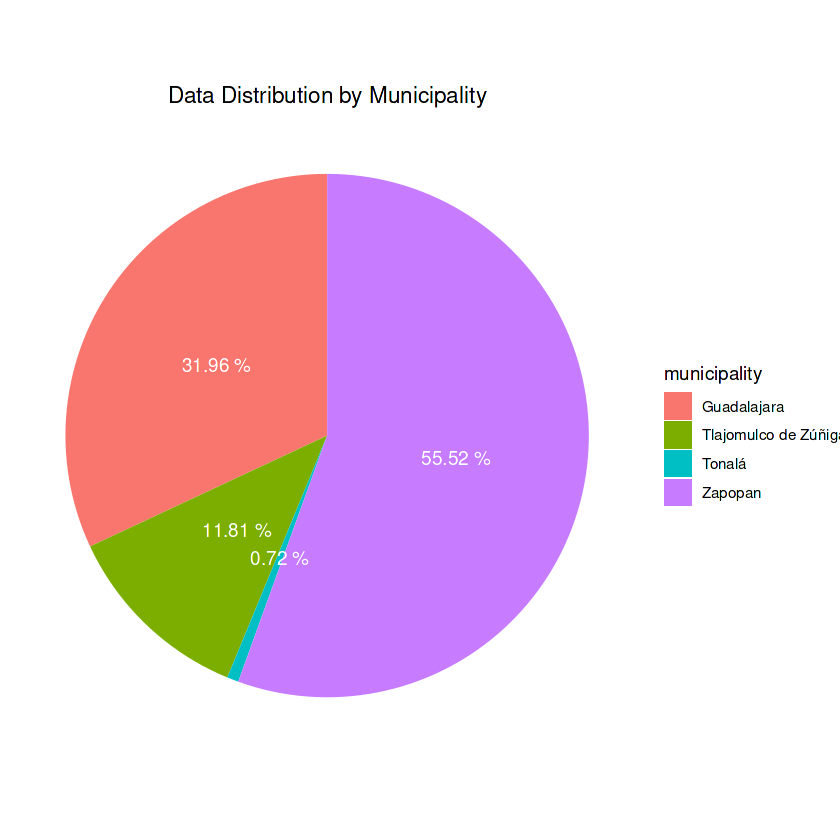

In [19]:
ggplot(data_records, aes(x = "", y = records, fill = municipality)) +
  geom_col() +  
  coord_polar(theta = "y") +                 # Convert to pie chart
  
  labs(
      title = "Data Distribution by Municipality"    # Title of the chart
  ) +                     
  geom_text(
      aes(label = paste(percentage, "%")), 
      position = position_stack(vjust = 0.5), # Add percentages in the center of the slices
      color = "white"                        # Color the text white 
  ) +
  theme_void()    +                             # Remove background and axes
  theme(
      plot.title = element_text(hjust = 0.5),  # Center the title
      plot.margin = margin(0, 0, 0, 0),        # Remove plot margin for a clean look
      axis.text.x = element_blank()            # Remove x-axis labels (for a pie chart)
  )                            

Based on the pie chart, the dataset has a strong imbalance in the distribution of data across municipalities. 

## Summary Statistics

In [20]:
summary(rentdc)

     price          no_rooms      no_bathrooms        area      
 Min.   : 2950   Min.   :1.000   Min.   :1.000   Min.   : 20.0  
 1st Qu.:16500   1st Qu.:2.000   1st Qu.:2.000   1st Qu.: 87.0  
 Median :23500   Median :3.000   Median :2.000   Median :120.0  
 Mean   :26051   Mean   :2.561   Mean   :2.324   Mean   :142.3  
 3rd Qu.:32000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:170.0  
 Max.   :90000   Max.   :5.000   Max.   :5.000   Max.   :400.0  
 neighborhood       municipality           type          
 Length:1677        Length:1677        Length:1677       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

In [21]:
write.csv(rentdc, "/kaggle/working/rentdc.csv", row.names = FALSE)

## Histograms

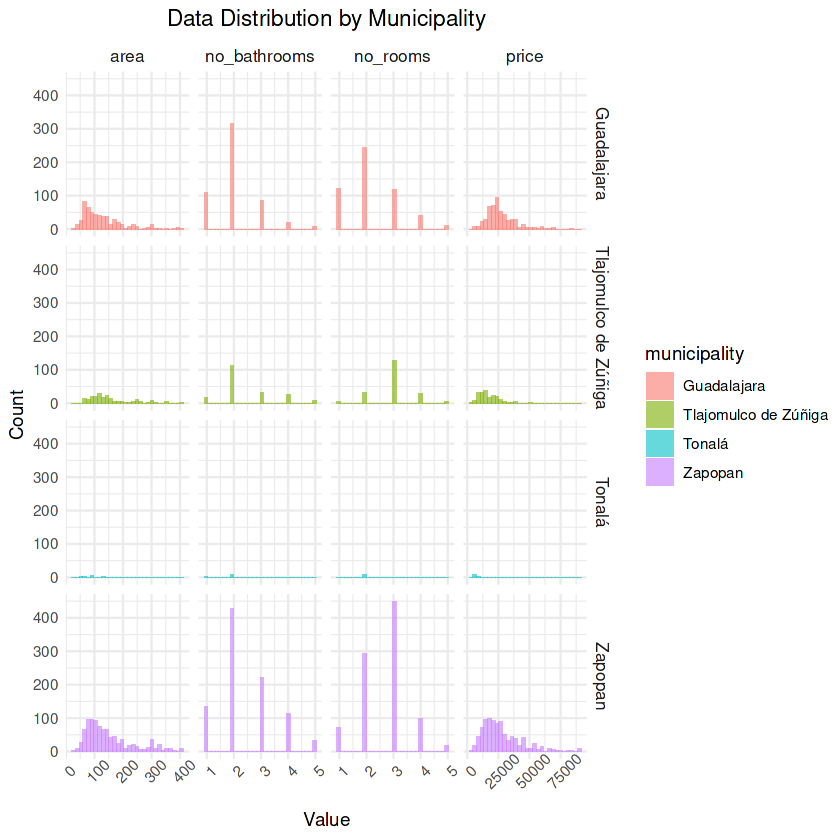

In [22]:
rent_long <- rentdc %>%
  pivot_longer(cols = c(price, area, no_rooms, no_bathrooms),  # Convert Data to Long Format
               names_to = "Variable", 
               values_to = "Value")


ggplot(rent_long, aes(x = Value, fill = municipality)) +
  geom_histogram(alpha = 0.6, bins = 30, position = "identity") +
  facet_grid(municipality ~ Variable, scales = "free_x") +  
  labs(title = "Data Distribution by Municipality", x = "Value", y = "Count") +
  theme_minimal() +  # Increase font size
  theme(strip.text = element_text(size = 10),  # Larger facet labels
        axis.text.x = element_text(angle = 45),
       plot.title = element_text(hjust = 0.5))  #Title x-axis labels



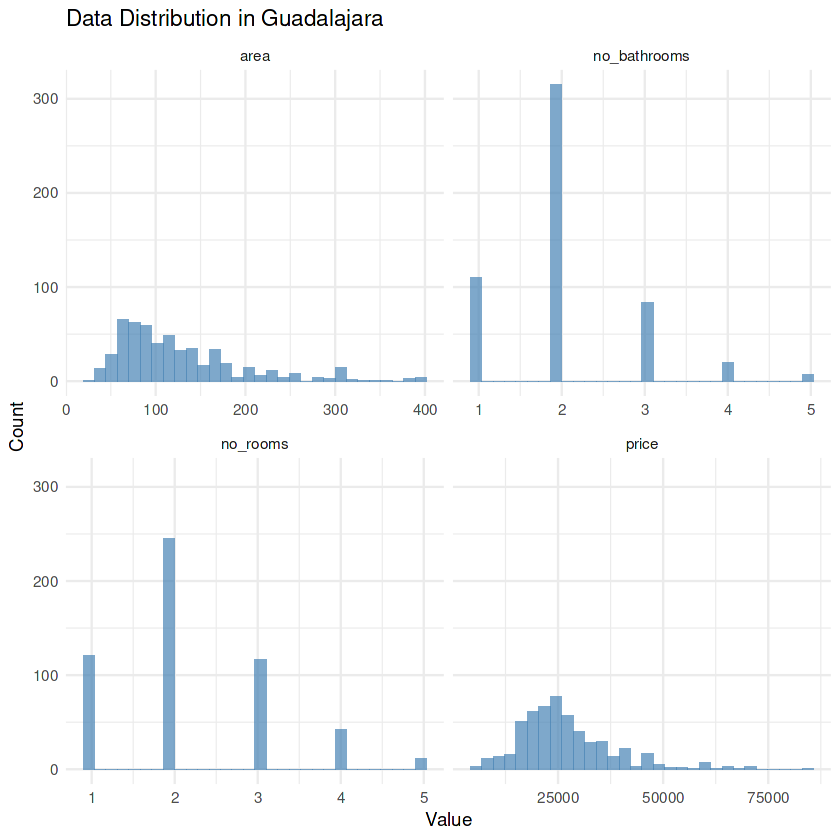

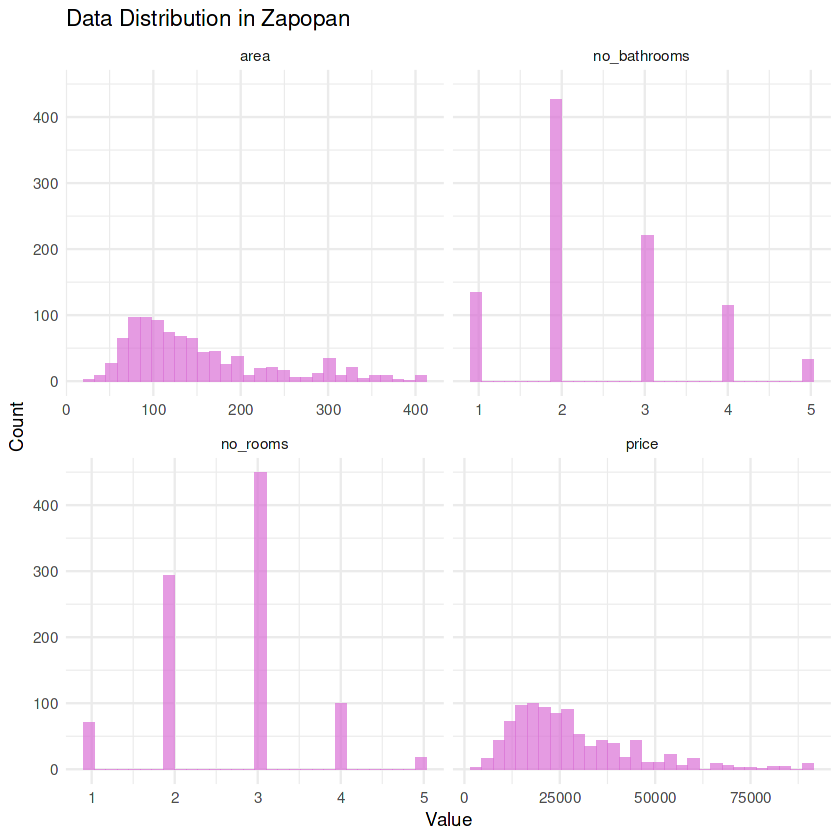

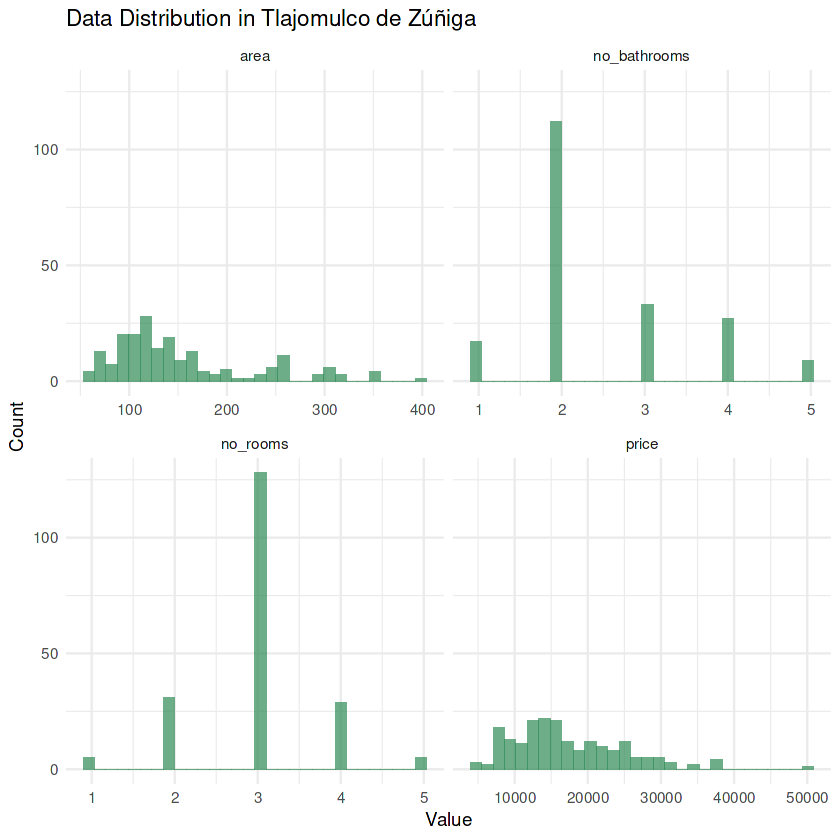

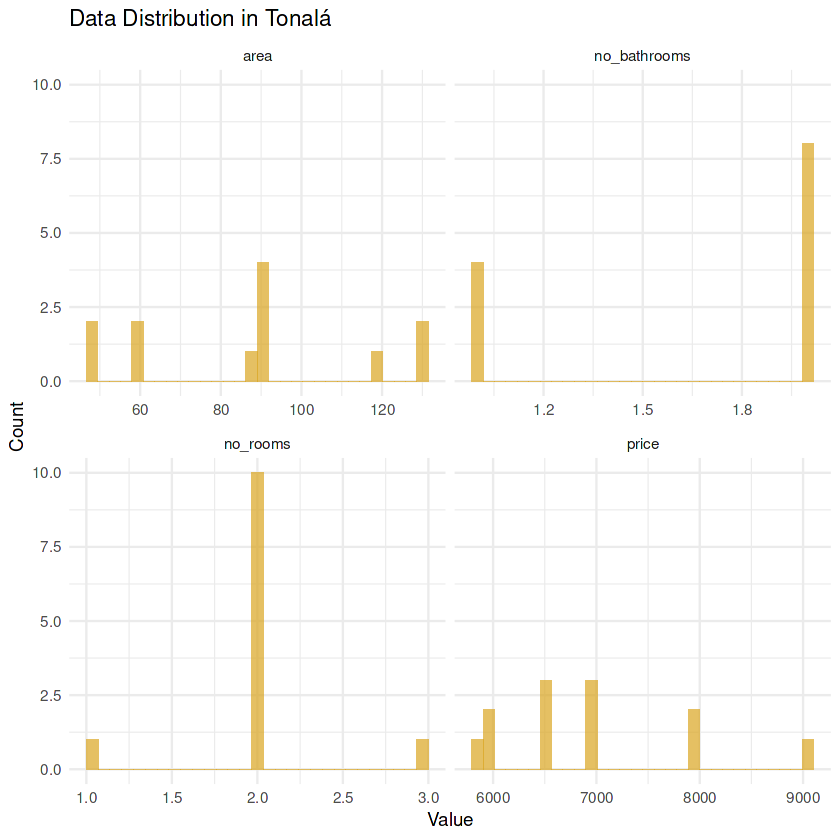

In [23]:
plot_histograms <- function(municipality_name, municipality_color, title) {  # Create a function to handle the plotting
  rent_long <- rentdc %>%
    filter(municipality == municipality_name) %>%
    pivot_longer(cols = c(price, area, no_rooms, no_bathrooms), 
                 names_to = "Variable", 
                 values_to = "Value")
  
  ggplot(rent_long, aes(x = Value)) +
    geom_histogram(fill = municipality_color, alpha = 0.7, bins = 30, position = "identity") +
    facet_wrap(~ Variable, scales = "free_x") +  
    labs(title = title, x = "Value", y = "Count") +
    theme_minimal()  
}  

# Call the function for each municipality with the specific title and color
plot_histograms("Guadalajara", "steelblue", "Data Distribution in Guadalajara")
plot_histograms("Zapopan", "orchid", "Data Distribution in Zapopan")
plot_histograms("Tlajomulco de Zúñiga", "seagreen", "Data Distribution in Tlajomulco de Zúñiga")
plot_histograms("Tonalá", "goldenrod", "Data Distribution in Tonalá")


## Distribution of Rental Prices by Property Features

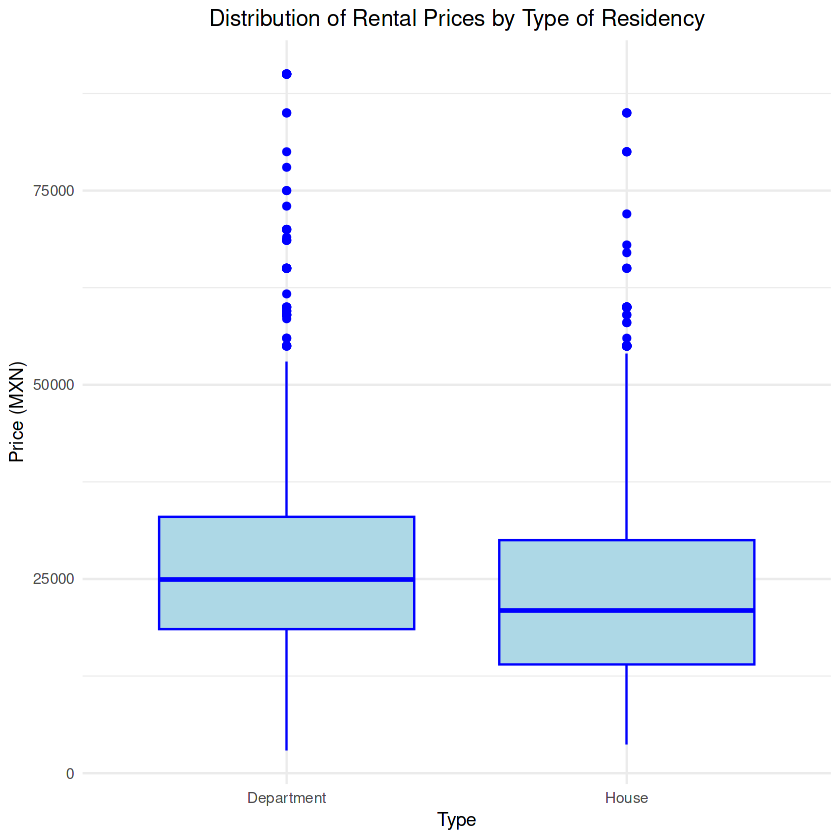

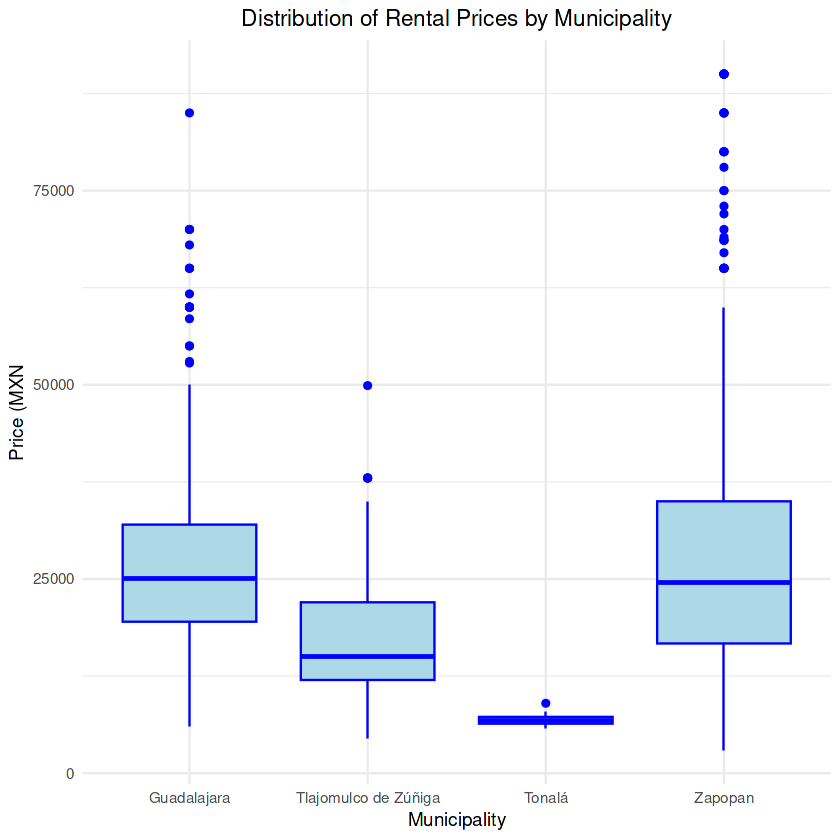

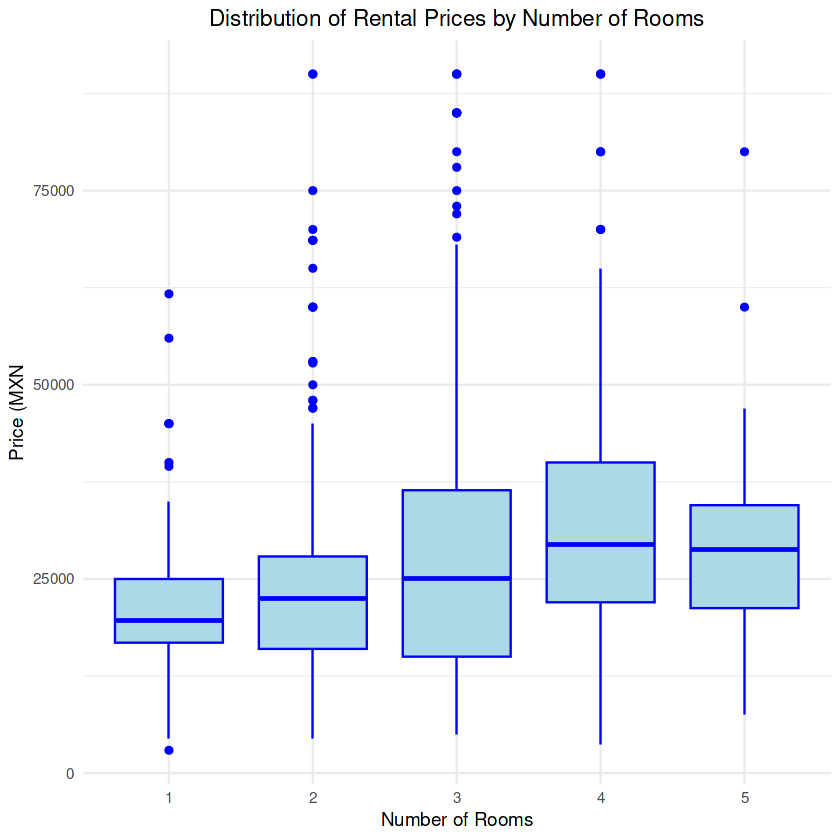

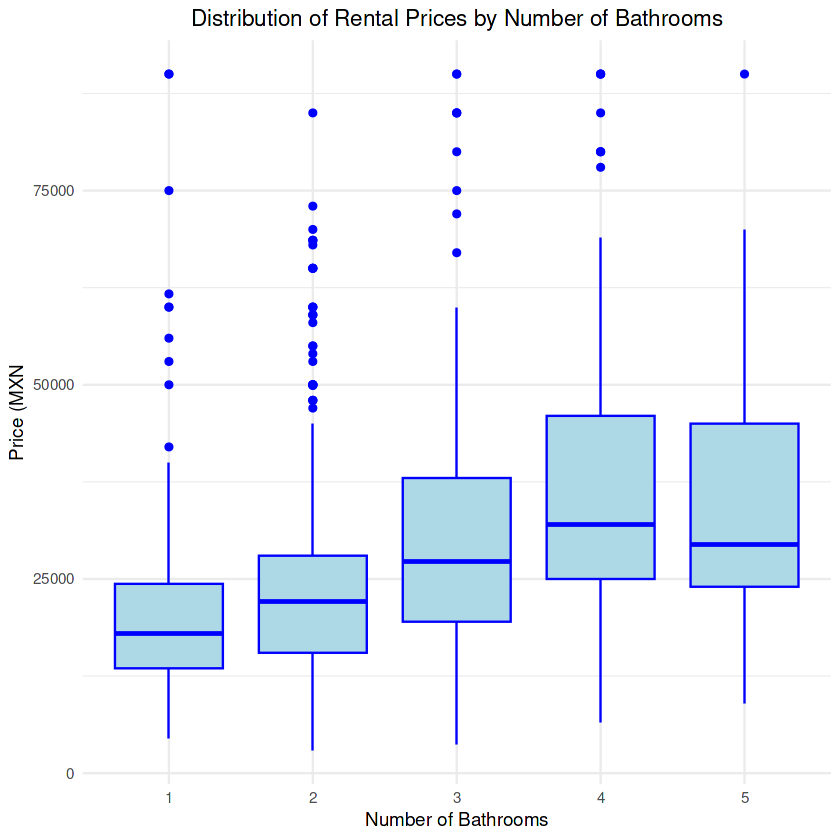

In [24]:
ggplot(rentdc, aes(x = type, y = price)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(title = "Distribution of Rental Prices by Type of Residency", x = "Type", y = "Price (MXN)") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(rentdc, aes(x = municipality, y = price)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(title = "Distribution of Rental Prices by Municipality", x = "Municipality", y = "Price (MXN") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(rentdc, aes(x = factor(no_rooms), y = price)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(title = "Distribution of Rental Prices by Number of Rooms", x = "Number of Rooms", y = "Price (MXN") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(rentdc, aes(x = factor(no_bathrooms), y = price)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(title = "Distribution of Rental Prices by Number of Bathrooms", x = "Number of Bathrooms", y = "Price (MXN") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

The boxplots provide valuable insights into the rental property market:

Departments are consistently more expensive than houses, as shown by their higher median prices across the municipalities. Guadalajara and Zapopan emerge as the municipalities with the highest rental prices, indicating that these urban areas are prime markets for more expensive properties. Additionally, there is a clear positive correlation between the number of rooms and bathrooms and the rental price, suggesting that larger properties, with more features, tend to command higher rents. These trends offer a comprehensive view of the factors influencing rental prices in the market.

## Mean and Median Summary Statistics

Since Zapopan (56.51%) and Guadalajara (31.16%) represent the majority of the dataset, the overall summary statistics are likely to be heavily influenced by these municipalities. To gain a more accurate understanding, I will calculate the summary statistics separately for each municipality.

In [25]:
avg_municipality <- rentdc %>%
  group_by(municipality, type) %>%
  summarise(
    avg_price = round(mean(price, na.rm = TRUE),2),
    avg_area = round(mean(area, na.rm = TRUE),2),
    avg_rooms = round(mean(no_rooms, na.rm = TRUE)),
    avg_bathrooms = round(mean(no_bathrooms, na.rm = TRUE)),
  ) 

avg_municipality

med_municipality <- rentdc%>%
  group_by(municipality,type)%>%
  summarise(
    med_price = median(price, na.rm = TRUE),
    med_area =  median(area, na.rm = TRUE),
    med_rooms = round(median(no_rooms, na.rm = TRUE)),
    med_bath = round(median(no_bathrooms, na.rm = TRUE))
  )

med_municipality

`summarise()` has grouped output by 'municipality'. You can override using the
`.groups` argument.


municipality,type,avg_price,avg_area,avg_rooms,avg_bathrooms
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Guadalajara,Department,26387.01,112.41,2,2
Guadalajara,House,29257.08,191.25,3,3
Tlajomulco de Zúñiga,Department,15714.29,94.00,2,2
Tlajomulco de Zúñiga,House,17327.23,156.44,3,3
Tonalá,Department,6888.89,82.67,2,2
Tonalá,House,7116.67,99.67,2,2
Zapopan,Department,29008.85,125.30,2,2
Zapopan,House,26379.64,174.34,3,3


`summarise()` has grouped output by 'municipality'. You can override using the
`.groups` argument.


municipality,type,med_price,med_area,med_rooms,med_bath
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Guadalajara,Department,25000,98.0,2,2
Guadalajara,House,25000,178.0,3,2
Tlajomulco de Zúñiga,Department,18600,89.5,2,2
Tlajomulco de Zúñiga,House,15000,132.0,3,2
Tonalá,Department,7000,90.0,2,2
Tonalá,House,6550,90.0,2,2
Zapopan,Department,25000,106.0,2,2
Zapopan,House,22900,147.5,3,3


There is a significant difference between mean and median due to some high-price outliers, especially in houses in Guadalajara and Zapopan. This highlight the influence of luxury or high-end properties.

The median provides a more accurate representation of typical rental prices, as it is less affected by extreme values.

## Which municipality has the highest and lowest rental prices based on the median?

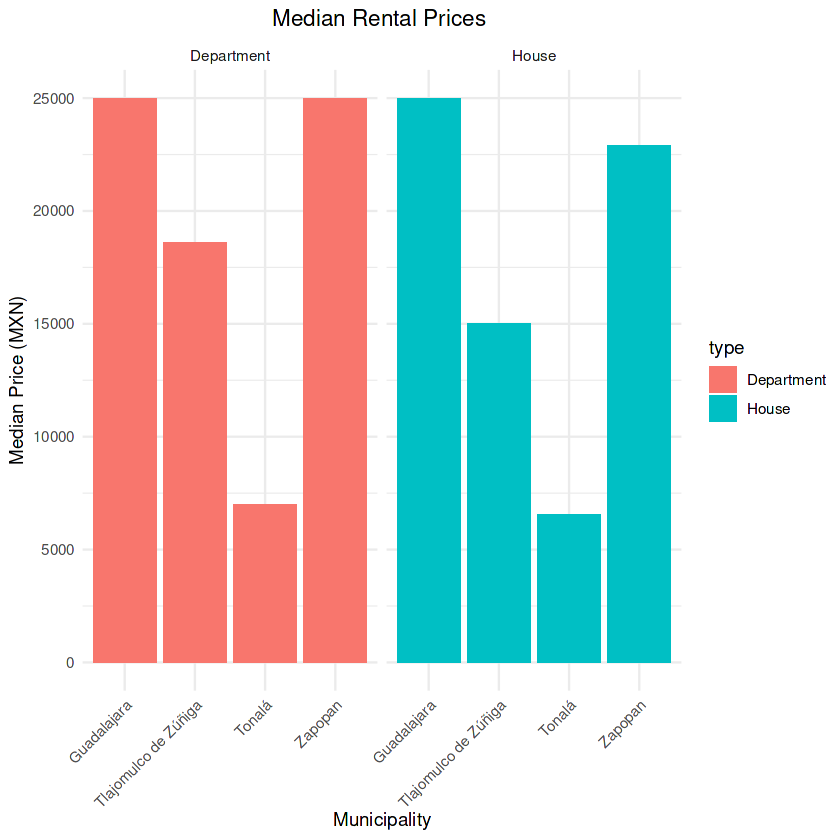

In [26]:
ggplot(med_municipality, aes(x = municipality, y = med_price, fill = type)) + 
  geom_col() + 
  labs(title = "Median Rental Prices ",
       x = "Municipality",
       y = "Median Price (MXN)") +
  facet_wrap(~type)+
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5),  # Center the title
      axis.text.x = element_text(angle = 45, hjust = 1)
  )
      

Zapopan and Guadalajara have the highest rent prices for both property types.
Tonala is the cheapest municipality, with rents significantly lower than the other three municipalities.

## What are the most expensive and least expensive neighborhood for renting by municipality?

In [27]:
rent_by_neighborhood <- rentdc %>%
  group_by(municipality,neighborhood,type) %>%
  summarise(avg_price = mean(price)) %>%
  arrange(municipality, type, desc(avg_price)) #from highest to lowest

`summarise()` has grouped output by 'municipality', 'neighborhood'. You can
override using the `.groups` argument.


## Top most/least expensive colonies by municipality for Houses


In [28]:
most_expensive_h <- rent_by_neighborhood %>%
  filter(type == "House")%>%
  group_by(municipality) %>%
  slice_max(avg_price, n = 1)%>%  # Most expensive colonies
  arrange(desc(avg_price))

least_expensive_h <- rent_by_neighborhood %>%
  filter(type == "House") %>%
  group_by(municipality) %>%
  slice_min(avg_price, n = 1) %>%
  arrange(avg_price)


most_expensive_h
least_expensive_h

municipality,neighborhood,type,avg_price
<chr>,<chr>,<chr>,<dbl>
Zapopan,Puerta de Hierro,House,70571.43
Guadalajara,Providencia 4a Secc,House,60000.00
Tlajomulco de Zúñiga,Cielo Contry Club,House,49900.00
Tonalá,Loma Dorada Delegación a,House,9000.00


municipality,neighborhood,type,avg_price
<chr>,<chr>,<chr>,<dbl>
Zapopan,Copalita,House,5000
Zapopan,Fraccionamiento Hacienda las Palomas,House,5000
Tlajomulco de Zúñiga,Lomas de San Agustin,House,5500
Tonalá,Hacienda Del Real,House,5800
Guadalajara,Circunvalación Oblatos,House,7500


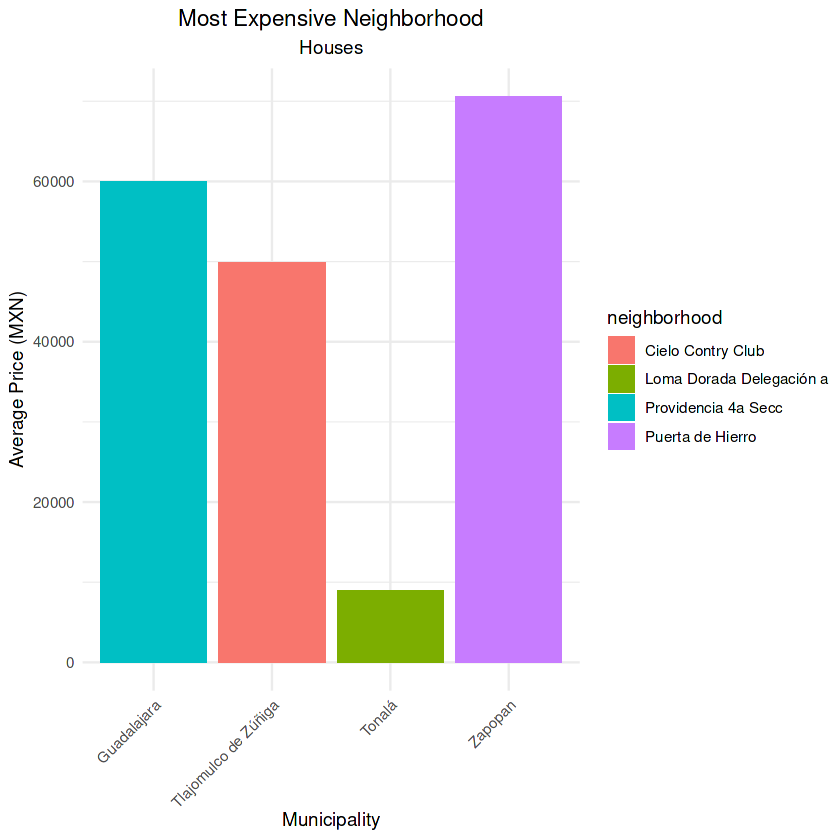

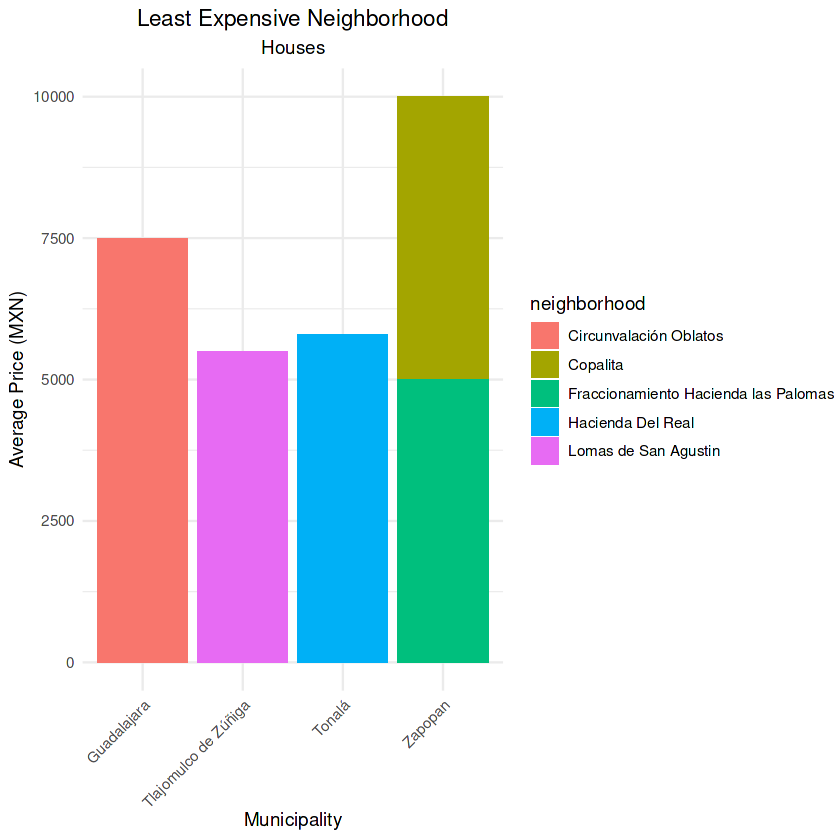

In [29]:
#Most expensive colonies
ggplot(most_expensive_h, aes(x = municipality, y = avg_price, fill = neighborhood)) + 
  geom_col() + 
  labs(title = "Most Expensive Neighborhood",
       subtitle= "Houses",
       x = "Municipality",
       y = "Average Price (MXN)") +
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  )
      

#Least expensive colonies
ggplot(least_expensive_h, aes(x = municipality, y = avg_price, fill = neighborhood)) + 
  geom_col() + 
   labs(title = "Least Expensive Neighborhood",
       subtitle= "Houses",
       x = "Municipality",
       y = "Average Price (MXN)") +
  theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  )

## Most/least expensive colonies by municipality for Departments

In [30]:
# Departments

most_expensive_d <- rent_by_neighborhood %>%
  filter(type == "Department")%>%
  group_by(municipality) %>%
  slice_max(avg_price, n = 1)%>%  # Most expensive colonies
  arrange(desc(avg_price))

# Get the top 5 least expensive colonies by municipality
least_expensive_d <- rent_by_neighborhood %>%
  filter(type == "Department")%>%
  group_by(municipality) %>%
  slice_min(avg_price, n = 1) %>% # Least expensive colonies
  arrange(avg_price)


print(most_expensive_d)
print(least_expensive_d)

# A tibble: 5 × 4
# Groups:   municipality [4]
  municipality         neighborhood                       type       avg_price
  <chr>                <chr>                              <chr>          <dbl>
1 Zapopan              Condominio Puerta Plata            Department    69000 
2 Zapopan              Fraccionamiento Cumbres            Department    69000 
3 Guadalajara          Fraccionamiento Vallarta San Jorge Department    56429.
4 Tlajomulco de Zúñiga Lomas de Santa Anita               Department    22000 
5 Tonalá               Fraccionamiento La Providencia     Department     8000 
# A tibble: 4 × 4
# Groups:   municipality [4]
  municipality         neighborhood        type       avg_price
  <chr>                <chr>               <chr>          <dbl>
1 Zapopan              El Mante            Department      2950
2 Tlajomulco de Zúñiga San Agustín         Department      4500
3 Guadalajara          Santa María de Silo Department      6000
4 Tonalá               Colinas de

For departments, Zapopan displays a highly diverse market, with both the highest average rental price at \\$69,000 in Condominio Puerta Plata and Fraccionamiento Cumbres and the lowest at \\$2,950 in El Mante, indicating a wide range of options. Guadalajara follows a similar trend, with prices ranging from \\$56,429 to \\$6,000, showcasing significant price variation within the municipality. Meanwhile, Tonalá and Tlajomulco de Zúñiga remain at the more affordable end, with Tonalá at \\$6,000, and Tlajomulco de Zúñiga reaching \\$4,500.

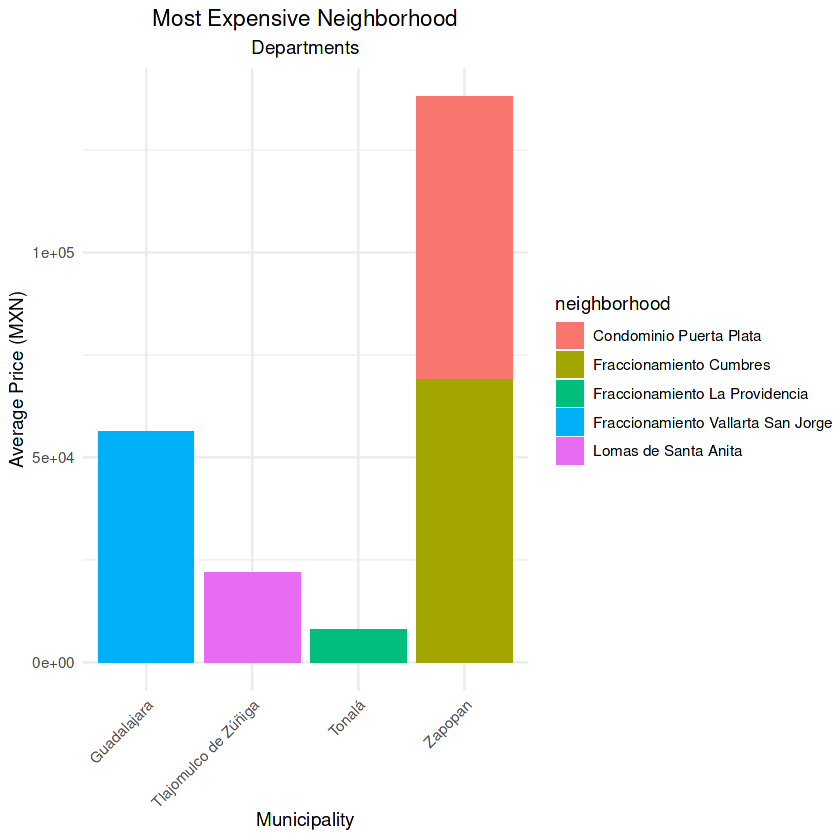

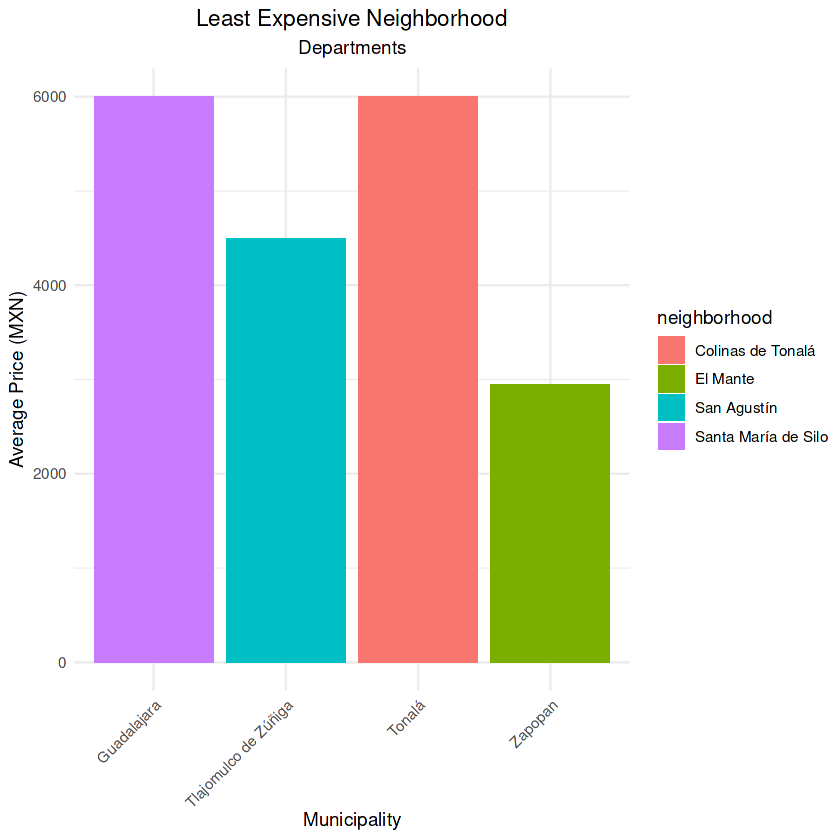

In [31]:
#Most expensive colonies

ggplot(most_expensive_d, aes(x = municipality, y = avg_price, fill = neighborhood)) + 
  geom_col() + 
   labs(title = "Most Expensive Neighborhood",
       subtitle= "Departments",
       x = "Municipality",
       y = "Average Price (MXN)") +
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  )

#Least expensive colonies
ggplot(least_expensive_d, aes(x = municipality, y = avg_price, fill = neighborhood)) + 
 geom_col() + 
   labs(title = "Least Expensive Neighborhood",
       subtitle= "Departments",
       x = "Municipality",
       y = "Average Price (MXN)") +
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  )

Zapopan and Guadalajara dominate both the higher and lower ends of the rental price for both departments and houses,offering a wide variety of options, while Tonalá and Tlajomulco provide more affordable rental choices, but with less reliable data due to underrepresentation in the dataset. 

## How does the property area differ across municipalities?

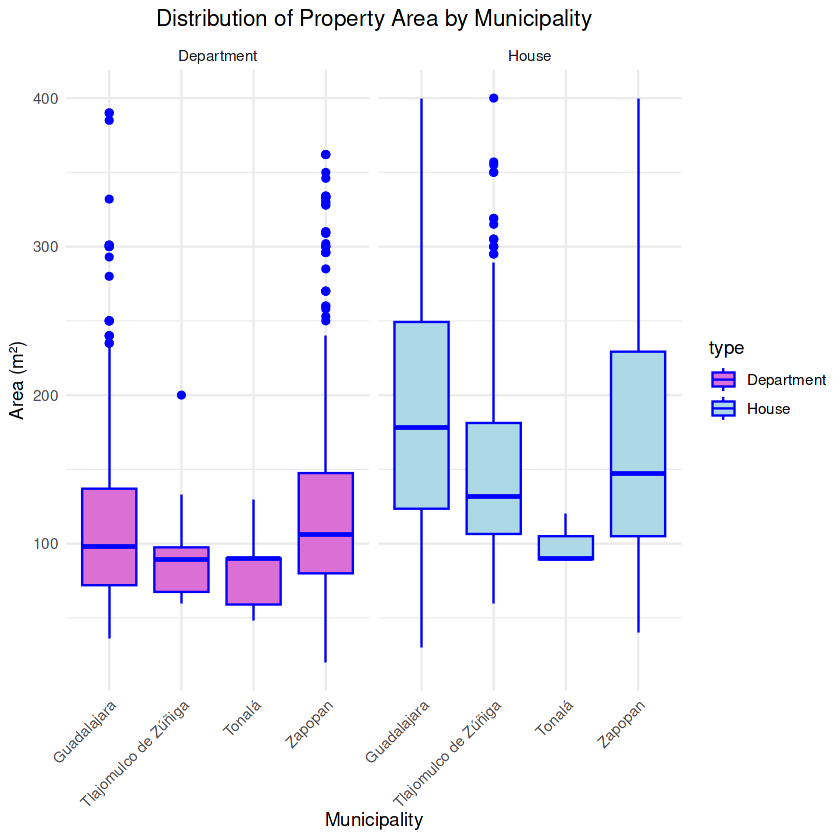

In [32]:
ggplot(rentdc, aes(x = municipality, y = area, fill = type)) + 
  geom_boxplot(color = "blue") +
  facet_wrap(~type) +
  labs(title = "Distribution of Property Area by Municipality", x = "Municipality", y = "Area (m²)") +
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  ) +
  scale_fill_manual(values = c("House" = "lightblue", "Department" = "orchid"))

The boxplot reveals that houses consistently have a larger area than departments across all municipalities, with Guadalajara having the most spacious houses and Tonalá the smallest. In contrast, department sizes remain relatively uniform, with Zapopan having the largest average but only by a small margin. This trend suggests that those seeking more living space may prefer houses, particularly in Guadalajara, whereas departments offer a more consistent option across different locations.

### How does the rental price vary with property area?

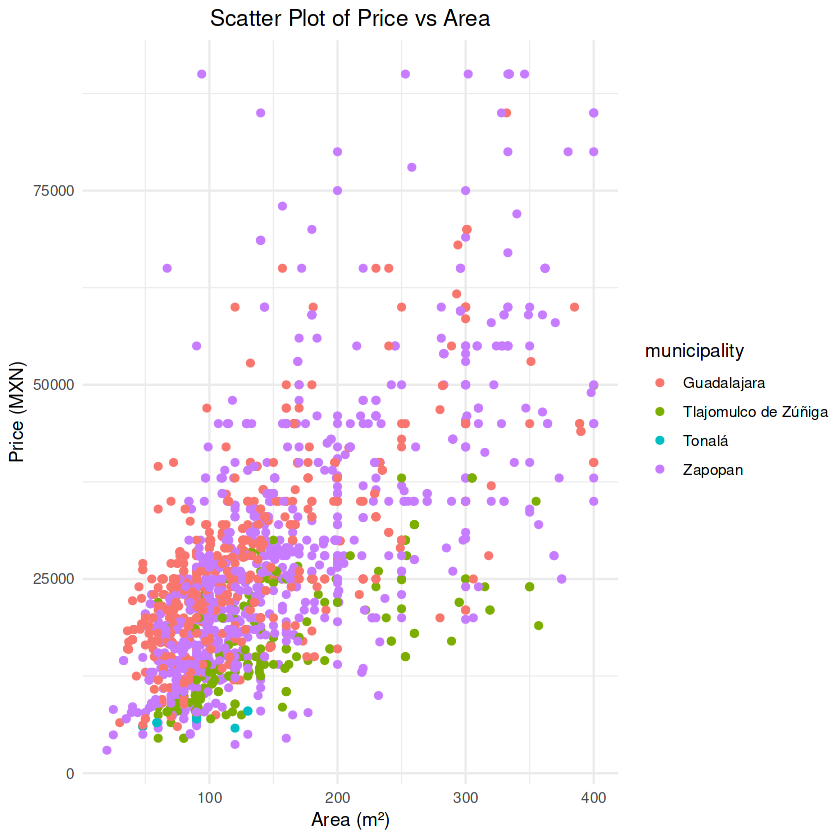

In [33]:
ggplot(rentdc, aes(x=area, y=price, color=municipality)) +
  geom_point() +
  ggtitle("Scatter Plot of Price vs Area") +
  xlab("Area (m²)") +
  ylab("Price (MXN)")+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))

The scatter plot indicates a positive correlation, where larger properties tend to have higher prices. However, there is significant variation within each municipality. Zapopan (purple) shows the highest price range, with several properties exceeding 75,000 MXN, while Tlajomulco de Zúñiga (green) has the lowest prices overall. Additionally, most properties are clustered below 200 m² and 25,000 MXN, suggesting that affordable housing is concentrated in smaller areas. The spread of points also suggests that factors beyond area influence pricing.

## Which neighborhoods have the highest and lowest rental costs per square meter?

Zapopan and Guadalajara have higher average costs per m², especially for departments and properties in urban areas like Fraccionamiento Bugambilias and Providencia. This reflects a more expensive housing market in these municipalities, particularly for smaller, well-located properties like departments.
Tonalá and Tlajomulco de Zúñiga have much lower average costs per m², suggesting more affordable housing options. Tlajomulco in particular stands out as the most affordable municipality overall, both for houses and departments.

In [34]:
rentdc$cost_m2 <- rentdc$price / rentdc$area #create a new column for the price per square meter

In [35]:
price_area <- rentdc %>%
  group_by(municipality, neighborhood,type,area) %>%
  summarise(avg_cost_m2 = mean(cost_m2, na.rm = TRUE)) %>% #Calculates the average price per square meter and Removes missing values (NA) before computing the mean 
  arrange(municipality,type,neighborhood, desc(avg_cost_m2)) #Sort by highest price per m²


expensive_price_area_h <- price_area %>%
filter(type== "House") %>%
group_by(municipality) %>%
  slice_max(avg_cost_m2, n = 1)%>% # Most expensive colonies
  arrange(desc(avg_cost_m2))


least_price_area_h <- price_area %>%
filter(type== "House") %>%
group_by(municipality) %>%
  slice_min(avg_cost_m2, n = 1)%>% # Least expensive colonies
  arrange(avg_cost_m2)

expensive_price_area_h
least_price_area_h



`summarise()` has grouped output by 'municipality', 'neighborhood', 'type'. You
can override using the `.groups` argument.


municipality,neighborhood,type,area,avg_cost_m2
<chr>,<chr>,<chr>,<int>,<dbl>
Zapopan,Fraccionamiento Bugambilias,House,90,611.1111
Guadalajara,Providencia,House,157,414.0127
Tlajomulco de Zúñiga,San Agustín,House,60,366.6667
Tonalá,Loma Dorada Delegación a,House,89,101.1236


municipality,neighborhood,type,area,avg_cost_m2
<chr>,<chr>,<chr>,<int>,<dbl>
Zapopan,Nuevo México,House,160,28.12500
Tonalá,Hacienda Del Real,House,120,48.33333
Tlajomulco de Zúñiga,Bosques de Santa Anita,House,357,53.22129
Guadalajara,Fraccionamiento Jardines Del Country,House,300,70.00000


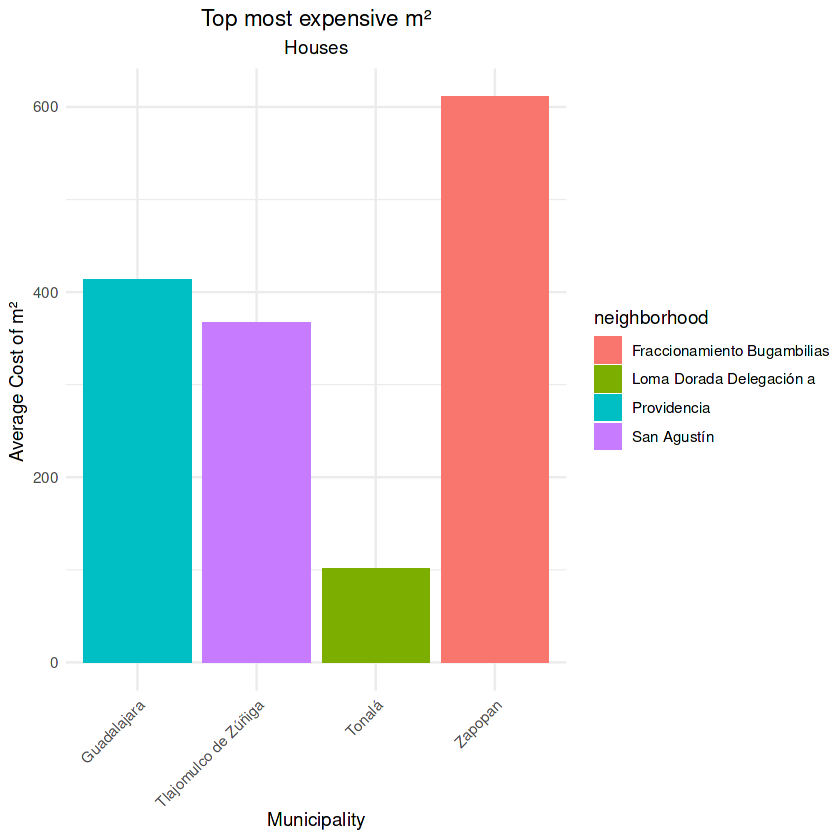

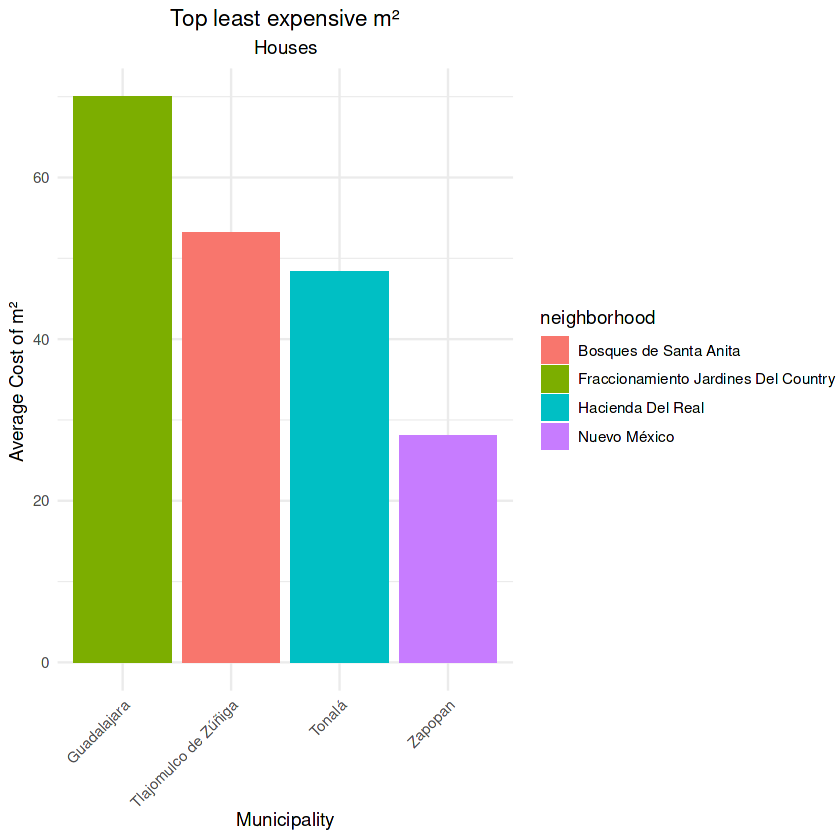

In [36]:
ggplot(expensive_price_area_h, aes(x = municipality, y = avg_cost_m2, fill = neighborhood)) + 
  geom_col() + 
   labs(title = "Top most expensive m²",
       subtitle= "Houses",
       x = "Municipality",
       y = "Average Cost of m² ") +
  theme_minimal()+
   theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  )

ggplot(least_price_area_h, aes(x = municipality, y = avg_cost_m2, fill = neighborhood)) + 
   geom_col() + 
   labs(title = "Top least expensive m²",
       subtitle= "Houses",
       x = "Municipality",
       y = "Average Cost of m² ") +
  theme_minimal()+
 theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  )

In [37]:
expensive_price_area_d <- price_area %>%
filter(type== "Department") %>%
group_by(municipality) %>%
  slice_max(avg_cost_m2, n = 1)%>% # Most expensive colonies
  arrange(desc(avg_cost_m2))


least_price_area_d <- price_area %>%
filter(type== "Department") %>%
group_by(municipality) %>%
  slice_min(avg_cost_m2, n = 1)%>% # Least expensive colonies
  arrange(avg_cost_m2)

expensive_price_area_d
least_price_area_d


municipality,neighborhood,type,area,avg_cost_m2
<chr>,<chr>,<chr>,<int>,<dbl>
Zapopan,Condominio Puerta Plata,Department,67,970.1493
Guadalajara,Prados de Providencia,Department,60,658.3333
Tlajomulco de Zúñiga,Punto Sur,Department,69,269.5652
Tonalá,Colinas de Tonalá,Department,48,125.0000


municipality,neighborhood,type,area,avg_cost_m2
<chr>,<chr>,<chr>,<int>,<dbl>
Zapopan,Fraccionamiento Residencial Victoria,Department,177,44.06215
Tonalá,Fraccionamiento La Providencia,Department,130,61.53846
Tlajomulco de Zúñiga,San Agustín,Department,60,75.00000
Guadalajara,Barranquitas,Department,200,80.00000
Guadalajara,Santa María de Silo,Department,75,80.00000


## Average rooms and bathrooms by municipality


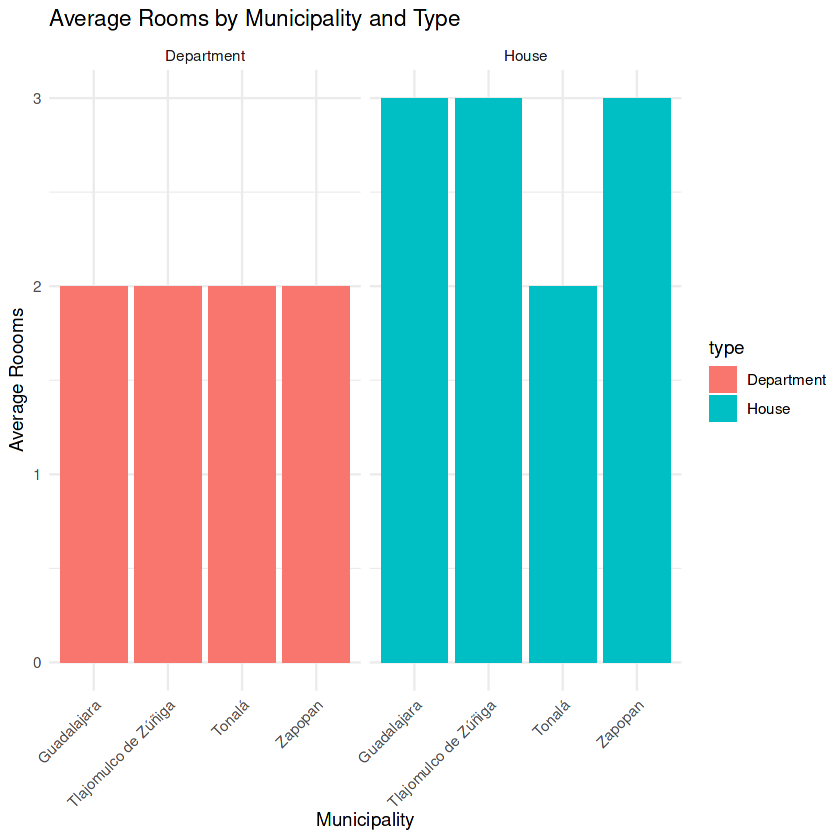

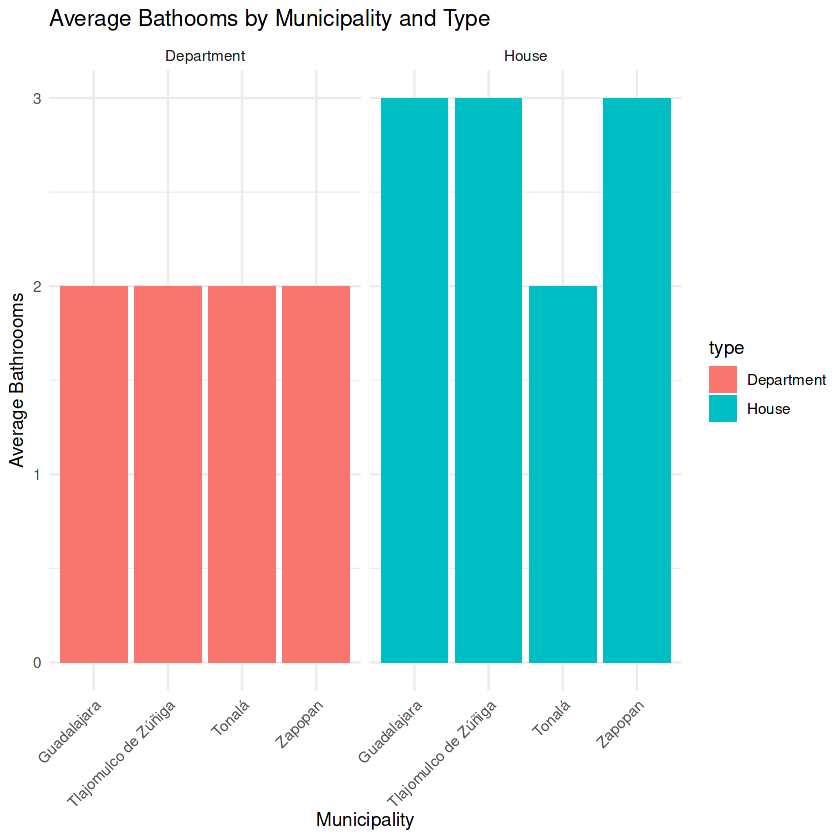

In [38]:
ggplot(avg_municipality, aes(x = municipality, y = avg_rooms, fill = type)) + 
  geom_col() + 
  labs(title = "Average Rooms by Municipality and Type",
       x = "Municipality",
       y = "Average Roooms") +
  facet_wrap(~type)+
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggplot(avg_municipality, aes(x = municipality, y = avg_bathrooms, fill = type)) + 
  geom_col() + 
  labs(title = "Average Bathooms by Municipality and Type",
       x = "Municipality",
       y = "Average Bathroooms") +
  facet_wrap(~type)+
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Distribution of Rental Prices by Number of Rooms and Bathrooms Across Municipalities

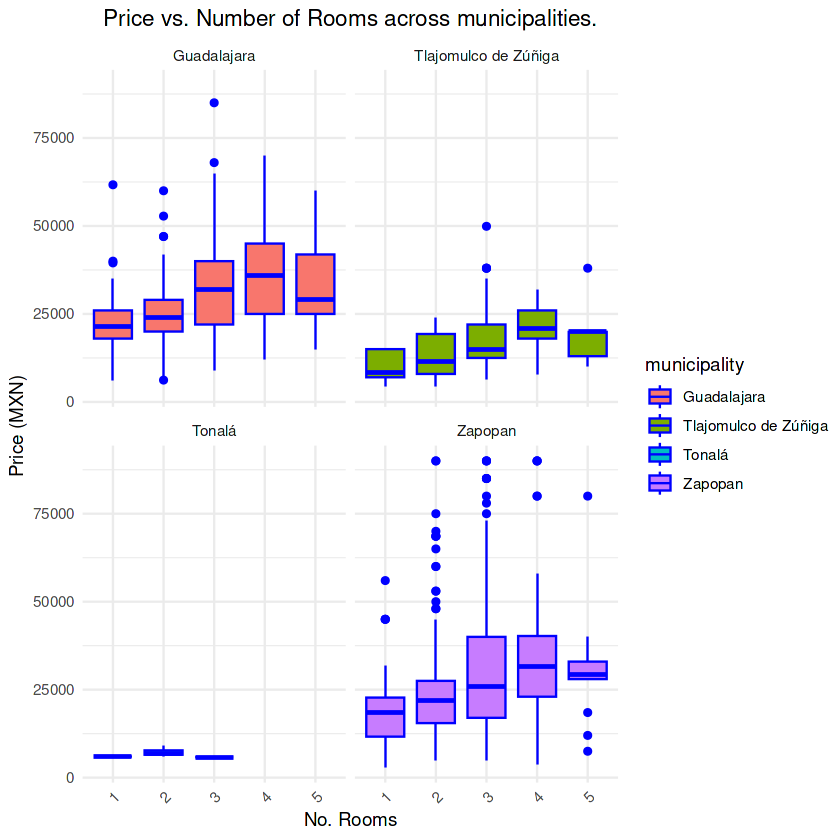

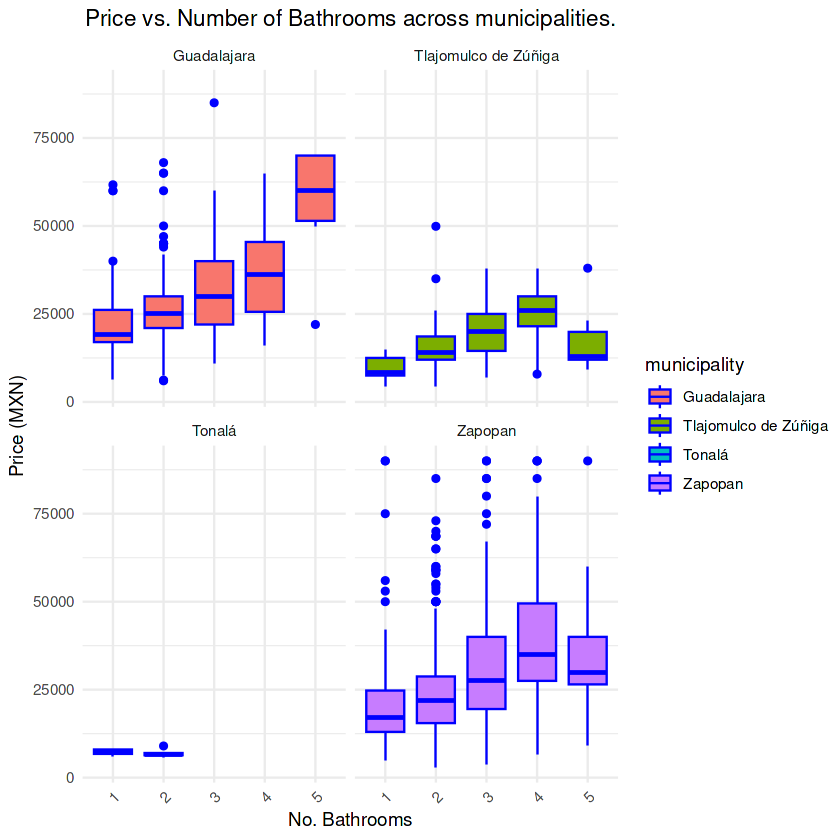

In [39]:
ggplot(rentdc, aes(x = factor(no_rooms), y = price, fill = municipality)) + 
  geom_boxplot(color = "blue") +
  facet_wrap(~municipality) +
  labs(title = "Price vs. Number of Rooms across municipalities.", x = "No. Rooms", y = "Price (MXN)") +
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  ) 

ggplot(rentdc, aes(x = factor(no_bathrooms), y = price, fill = municipality)) + 
  geom_boxplot(color = "blue") +
  facet_wrap(~municipality) +
  labs(title = "Price vs. Number of Bathrooms across municipalities.", x = "No. Bathrooms", y = "Price (MXN)") +
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1)
  ) 

The boxplots display how rental prices vary with the number of rooms and bathrooms across different municipalities. In Guadalajara and Tlajomulco de Zúñiga, rental prices generally increase as the number of rooms and bathrooms rises. Zapopan, however, exhibits the widest price range, with notable variation and multiple high-value outliers, indicating a more diverse and dynamic rental market. In contrast, Tonalá shows minimal price variation, suggesting a less active market, though this may be influenced by limited data representation, warranting further verification.

## Analyze relationships

#### Correlation Matrix

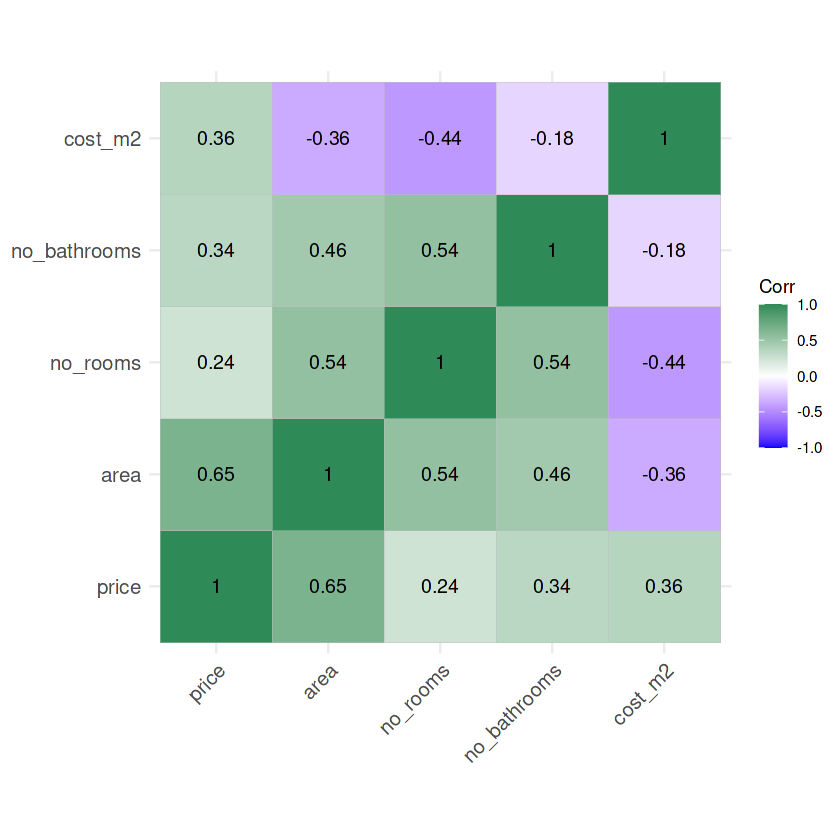

In [40]:
cor_matrix <- cor(rentdc[ , c("price", "area", "no_rooms", "no_bathrooms", "cost_m2")])  #The , before c(...) means we are selecting all rows.

ggcorrplot(cor_matrix, 
           method="square",
           lab=TRUE,   #Adds correlation values to the matrix.
           colors = c("blue", "white", "seagreen"))

The correlation matrix reveals that there is a moderate positive correlation between property area and rental price, indicating that larger properties  tend to have a higher rental price. The strength of this correlation suggests that area is a significant determinant of price; however, other factors likely influence rental costs

#### How does rental price correlate with property area in each municipality? 

In [41]:
cor_price_area <- rentdc %>%
filter(!is.na(area))%>%   #only keep rows where area is not NA
group_by (municipality) %>%
summarise(correlation= cor(price,area))

cor_price_area

municipality,correlation
<chr>,<dbl>
Guadalajara,0.6787055
Tlajomulco de Zúñiga,0.7067593
Tonalá,0.5018658
Zapopan,0.6963436


The municipalities with stronger correlations (Tlajomulco and Zapopan) suggest that area is a more consistent predictor of rent price in these locations.
Guadalajara shows a moderate correlation, implying there might be a balance of factors affecting rent prices, not just area.
Finally for Tonala, which presented the weakest correlation indicates that area is not a main factor for determining price, other factors may play a more prominent role, nevertheless more data is required to sustain this as it is the most underrepresented municipality in our dataset

#### What is the relationship between rental price and the number of rooms?

In [42]:
cor_price_rooms <- rentdc %>%
  filter(!is.na(no_rooms)) %>%
  group_by(municipality) %>%
  summarise(correlation = cor(price, no_rooms))

cor_price_rooms

municipality,correlation
<chr>,<dbl>
Guadalajara,0.39093826
Tlajomulco de Zúñiga,0.32890809
Tonalá,-0.04448336
Zapopan,0.24915757


Given the weak correlations in general, the number of rooms may not be as important a predictor of rental price as other factors

#### Analysys Of Variance (ANOVA)
ANOVA is a parametric statistical test that compares the means of a continuous variable across  categories of a categorical variable.

In this case, I performed an ANOVA to determine whether the mean rental price (price) varies significantly across  neighborhoods.

In [43]:
summary(aov(price ~ neighborhood, data = rentdc))


               Df    Sum Sq   Mean Sq F value Pr(>F)    
neighborhood  292 2.054e+11 703315672   7.449 <2e-16 ***
Residuals    1377 1.300e+11  94419258                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
7 observations deleted due to missingness

The neighborhood have a high significant effect on rent price: The p-value (<2e-16) is extremelly small, meaning the variation in rental prices between colonies is statiscally significant and the F-value ( 7.449) is high, which means that the differences in rental prices between neighborhoods are larger than the variability within those neighborhoods

Then, I applied ANOVA to assess whether there are significant differences in house rental prices based on neighborhoods within each municipality (Guadalajara, Tlajomulco de Zúñiga, Tonalá, and Zapopan).

In [44]:
summary(aov(price ~ neighborhood, data = subset(rentdc, municipality == "Guadalajara")))
summary(aov(price ~ neighborhood, data = subset(rentdc, municipality == "Tlajomulco de Zúñiga")))
summary(aov(price ~ neighborhood, data = subset(rentdc, municipality == "Tonalá")))
summary(aov(price ~ neighborhood, data = subset(rentdc, municipality == "Zapopan")))

              Df    Sum Sq   Mean Sq F value Pr(>F)    
neighborhood  79 2.966e+10 375443966    4.27 <2e-16 ***
Residuals    456 4.010e+10  87929535                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df    Sum Sq   Mean Sq F value Pr(>F)    
neighborhood  45 9.084e+09 201864561   12.47 <2e-16 ***
Residuals    152 2.461e+09  16190556                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             Df   Sum Sq Mean Sq   F value Pr(>F)    
neighborhood  6 10107292 1684549 2.436e+31 <2e-16 ***
Residuals     5        0       0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df    Sum Sq   Mean Sq F value Pr(>F)    
neighborhood 161 1.455e+11 903907078   8.043 <2e-16 ***
Residuals    762 8.563e+10 112378925                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
7 observations deleted due to missingness

#### Summary of findings

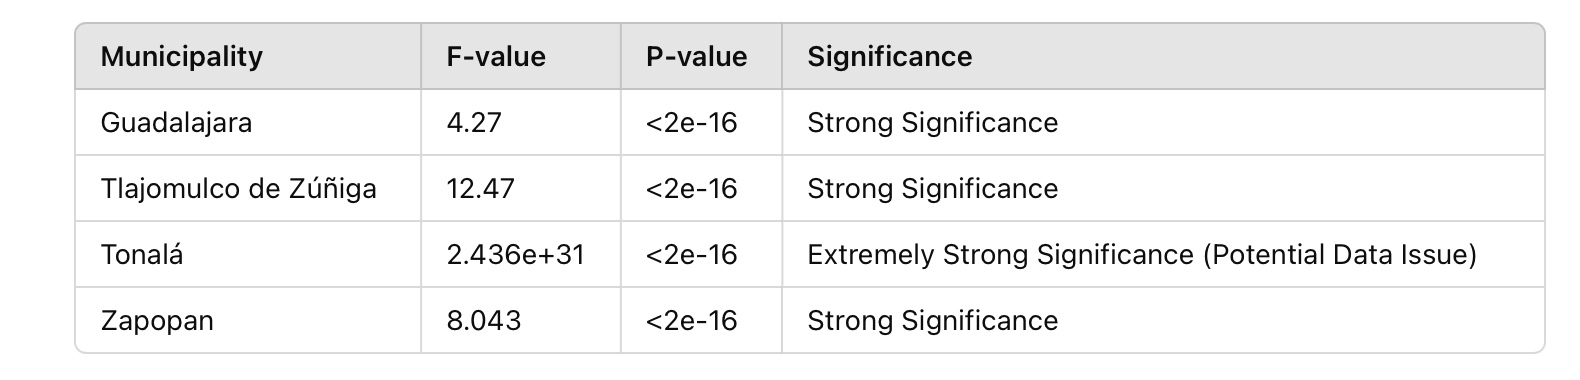

For all four municipalities (Guadalajara, Tlajomulco, Tonalá, and Zapopan), the p-values are all less than 0.001, which indicates statistically significant differences in the price of rentals between neighborhoods within each city. Nevertheless, Tonalá's results are extreme, possibly due to very few observations. The F values suggest that the variance in prices is not just due to random chance, and neighborhoods do play an important role in explaining price variation.
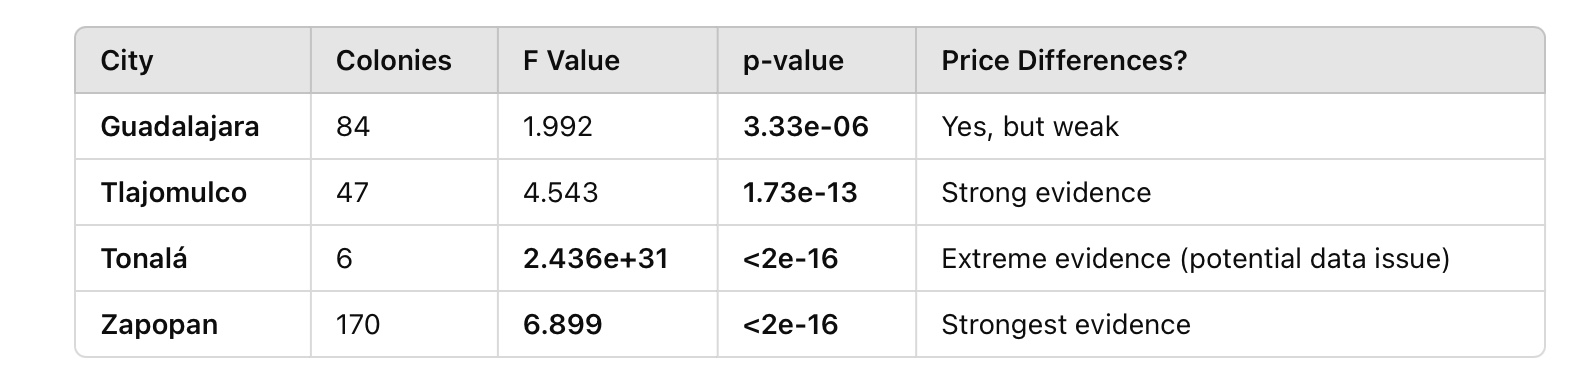
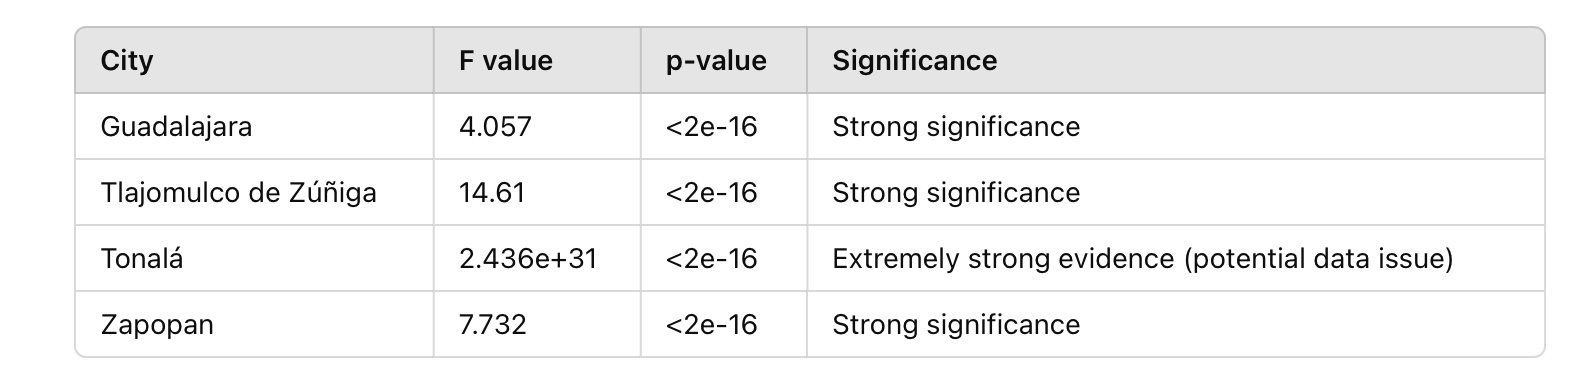
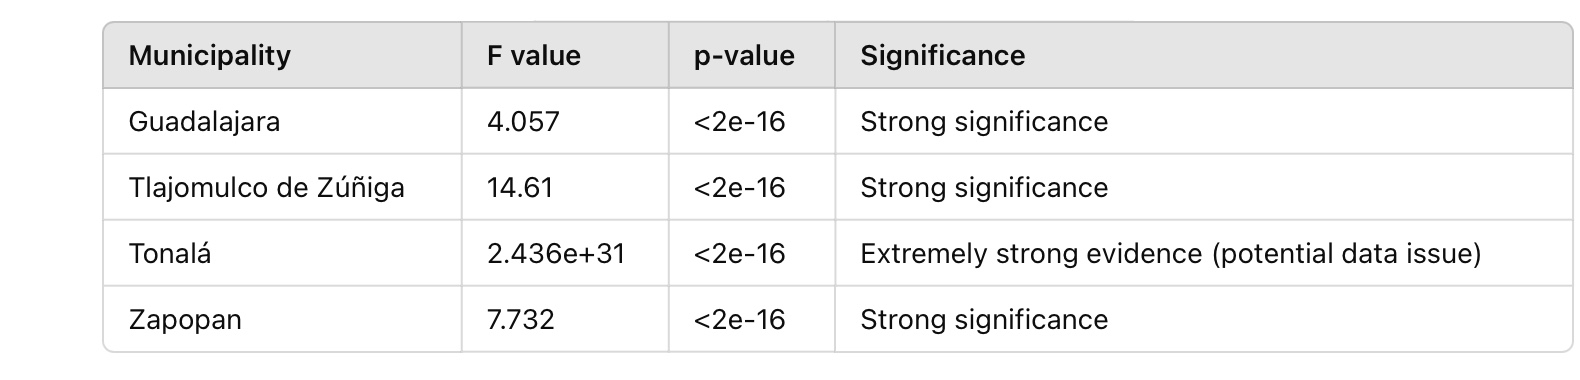